# LATAM - Case Study for monetization Strategy

> Using attached dummy data, please perform an assessment of this business and prepare a set of meeting materials

> Assume this business earns revenue through advertisements shown on a mobile video content platform

### 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### 2. Data Processing

In [228]:
# Load the data
df = pd.read_csv('data/latam_data.csv', parse_dates=['date']).fillna(0)

# Define the explicit order for the region column.
order = ['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 
         'Eight', 'Nine', 'Ten', 'Eleven', 'Twelve', 'Thirteen', 'Fourteen']

# Convert the 'region' column to an ordered categorical with the defined order.
df['region'] = pd.Categorical(df['region'], categories=order, ordered=True)

# Data Cleaning
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 date                   0
ad_product_category    0
region                 0
ad_placement           0
industry               0
impressions            0
cpm                    0
customer_id            0
account_id             0
revenue                0
dtype: int64


In [229]:
df.describe()[['date', 'impressions', 'cpm', 'revenue']]

,date,impressions,cpm,revenue
count,65534,65534.000,65534.000,65534.000
mean,2019-02-07 13:01:43.384502528,192866.175,1.346,1020.548
min,2018-08-19 00:00:00,0.000,0.000,0.000
25%,2018-12-29 00:00:00,0.000,0.000,0.000
50%,2019-02-23 00:00:00,0.000,0.000,0.000
75%,2019-04-03 00:00:00,0.000,0.000,0.000
max,2019-05-03 00:00:00,29058606.000,1224.000,477532.266
std,NaN,1894809.134,9.351,9182.470


### 3. Exploration of data

In [230]:
df_ts = df.groupby('date').agg(
    total_rows=pd.NamedAgg(column='account_id', aggfunc='count'),
    total_impressions=pd.NamedAgg(column='impressions', aggfunc='sum'),
    average_cpm=pd.NamedAgg(column='cpm', aggfunc='mean'),
    total_revenue=pd.NamedAgg(column='revenue', aggfunc='sum')
).reset_index()

# random 5 rows
df_ts.sample(5)

,date,total_rows,total_impressions,average_cpm,total_revenue
31,2018-09-19,86,54246695,7.253,247407.411
90,2018-11-17,129,48618621,0.143,198266.395
175,2019-02-10,353,48929420,0.567,346681.351
121,2018-12-18,185,51597070,0.313,285852.686
19,2018-09-07,112,40744463,4.826,150350.288


In [265]:
def pivot_table(index, columns, values=['total_impressions', 'average_cpm'], df=df):

    # Pivot the data# Grouping by Region and Category
    grouped = df.groupby([index, columns]).agg(
        total_impressions=pd.NamedAgg(column='impressions', aggfunc='sum'),
        average_cpm=pd.NamedAgg(column='cpm', aggfunc='mean'),
        total_revenue=pd.NamedAgg(column='revenue', aggfunc='sum')
    ).reset_index()
    
    df_pivot = grouped.pivot(
        index=index, 
        columns=columns, 
        values=values
    )

    # Swap the levels so that the ad_product_category is on top
    df_pivot.columns = df_pivot.columns.swaplevel(0, 1)

    # Optionally, sort the columns so they're grouped nicely
    df_pivot = df_pivot.sort_index(axis=1, level=0).fillna('-')

    return df_pivot

In [268]:
pivot_table(index='region', columns='ad_product_category', values=['total_impressions', 'average_cpm'])

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/3240131866.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([index, columns]).agg(


ad_product_category           A                             B  \
                    average_cpm total_impressions average_cpm   
region                                                          
One                      13.571    1143129177.000      10.307   
Two                       0.843    6380707180.000       2.486   
Three                     1.145      32200358.000      13.834   
Four                      0.390    4557488721.000       3.453   
Five                     29.860        509053.000           -   
Six                       0.000             0.000       2.343   
Seven                     0.000             0.000       7.131   
Eight                     0.000             0.000       1.666   
Nine                      0.000             0.000       1.787   
Ten                       0.000             0.000       0.943   
Eleven                    0.000             0.000       7.347   
Twelve                    0.000             0.000           -   
Thirteen                  0.000             0.000       0.000   
Fourteen                      -             0.000       0.000   

ad_product_category                             C                    
                    total_impressions average_cpm total_impressions  
region                                                               
One                       3777357.000       0.000             0.000  
Two                     309985871.000       0.000             0.000  
Three                    12650154.000       0.000             0.000  
Four                    164100434.000       0.000             0.000  
Five                            0.000           -             0.000  
Six                      11376882.000       0.000             0.000  
Seven                     7234417.000       0.000             0.000  
Eight                     7365698.000       0.000             0.000  
Nine                      1926342.000           -             0.000  
Ten                       2359227.000       0.000             0.000  
Eleven                    4481025.000       0.000             0.000  
Twelve                          0.000           -             0.000  
Thirteen                        0.000           -             0.000  
Fourteen                        0.000           -             0.000

* regions ['Twelve', 'Thirteen', 'Fourteen'] dont generate any revenue
* product C doesnt generate any revenue

In [233]:
# --- 3. Data Loading and Initial Cleaning ---

print("Original DataFrame Info:")
df.info()
print("\nOriginal DataFrame Shape:", df.shape)

Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 65534 non-null  datetime64[ns]
 1   ad_product_category  65534 non-null  object        
 2   region               65534 non-null  category      
 3   ad_placement         65534 non-null  object        
 4   industry             65534 non-null  object        
 5   impressions          65534 non-null  int64         
 6   cpm                  65534 non-null  float64       
 7   customer_id          65534 non-null  object        
 8   account_id           65534 non-null  float64       
 9   revenue              65534 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 4.6+ MB

Original DataFrame Shape: (65534, 10)


In [234]:
# Convert account_id to string and handle NaNs for easier grouping
df['account_id'] = df['account_id'].fillna('Unknown').astype(str)

# Create a dataframe focusing on rows where monetization data exists
df_monetized = df.dropna(subset=['cpm', 'revenue']).copy()
print(f"\nDataFrame shape after dropping rows with missing CPM/Revenue: {df_monetized.shape}")


DataFrame shape after dropping rows with missing CPM/Revenue: (65534, 10)


In [235]:
# For CPM calculations and performance analysis, impressions must be greater than 0
df_perf = df_monetized[df_monetized['impressions'] > 0].copy()
print(f"DataFrame shape after filtering for impressions > 0: {df_perf.shape}")

DataFrame shape after filtering for impressions > 0: (11018, 10)


In [236]:
# Calculate revenue manually to check consistency
df_perf['calculated_revenue'] = (df_perf['impressions'] / 1000) * df_perf['cpm']
# Check if the existing revenue column is close to the calculation
revenue_check = np.isclose(df_perf['revenue'], df_perf['calculated_revenue'])
print(f"\nRevenue column consistent with Impressions*CPM/1000? {revenue_check.all()}")
if not revenue_check.all():
    print(f"WARNING: {sum(~revenue_check)} rows have inconsistent revenue calculations.")
    # Decide whether to use df_perf['revenue'] or df_perf['calculated_revenue']
    # For now, we'll proceed assuming df_perf['revenue'] is the source of truth,
    # but flag this discrepancy.


Revenue column consistent with Impressions*CPM/1000? True


### 4. Plots

In [462]:
# plots config
# --- 1. Style Configuration ---
# Set a clean seaborn style
# --- Global Plot Aesthetics ---
bege_color = "#fffce9"
sns.set_style("whitegrid", {
    "axes.facecolor": bege_color,
    "figure.facecolor": bege_color
})
plt.rcParams['figure.figsize'] = (24, 8)
plt.rcParams['figure.facecolor'] = bege_color
plt.rcParams['axes.facecolor'] = bege_color
# Further customize plot aesthetics (optional)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.family'] = 'monospace'
grey = '#363636'

plt.rcParams['axes.linewidth'] = 0.3
plt.rcParams['axes.edgecolor'] = grey
plt.rcParams['xtick.color'] = grey
plt.rcParams['ytick.color'] = grey


# Function to apply final touches like removing spines
def finalize_plot(ax, title=None, xlabel=None, ylabel=None, despine_left=False, despine_bottom=False, 
                  format_y_as_money=False, format_y_as_thousands=False, format_y_as_millions=False, format_y_as_money_millions=False, 
                  format_y_as_impressions=False):
    """Removes top and right spines, optionally left and bottom, and sets labels/title.
    
    Parameters:
    -----------
    format_y_as_money : bool, optional
        If True, formats y-axis as currency with $ and commas
    format_y_as_thousands : bool, optional
        If True, formats y-axis numbers with commas as thousand separators
    """
    sns.despine(ax=ax, top=True, right=True, left=despine_left, bottom=despine_bottom)
    if title:
        ax.set_title(title, fontsize=16, pad=20)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=12, labelpad=15)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=12, labelpad=15)
    
    # Format y-axis if requested
    if format_y_as_money:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'${x:,.0f}'))
    if format_y_as_money_millions:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'${x / 1_000_000:,.1f}M'))
    elif format_y_as_thousands:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x / 1000:,.0f}K'))
    elif format_y_as_millions:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x / 1_000_000:,.0f}M'))
    elif format_y_as_impressions:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))
    
    plt.tight_layout()
    plt.show()

def add_annotations(ax, fmt="{:,.0f}", is_bar=True, offset=0.01):
    """Adds value labels to bars or points on a matplotlib Axes object."""
    if is_bar:
        # For bar plots
        for p in ax.patches:
            # Adjust y position slightly above the bar top
            y_pos = p.get_height() * (1 + offset)
            # Adjust x position to be centered on the bar
            x_pos = p.get_x() + p.get_width() / 2
            # Format and add text
            label = fmt.format(p.get_height())
            if p.get_height() > 0: # Only annotate non-zero bars
                ax.text(x_pos, y_pos, label, ha='center', va='bottom', fontsize=9)
    else:
        # For line plots or scatter plots (adapting might be needed)
        # This is a basic example for line plots, might need adjustment
        for line in ax.get_lines():
            x_data, y_data = line.get_data()
            # Annotate maybe the last point or significant points
            if len(x_data) > 0 and len(y_data) > 0:
                 # Annotate last point as an example
                 label = fmt.format(y_data[-1])
                 ax.text(x_data[-1], y_data[-1]*(1 + offset*2), label, ha='center', va='bottom', fontsize=9)



In [429]:
def plot_time_trends(data, date_col, value_col, agg_func='sum', freq='W',
                     group_by=None, title=None, xlabel=' ', ylabel=None,
                     use_annot=False, annot_fmt="{:,.0f}", show_moving_avg=False, 
                     palette='Paired', **finalize_kwargs):
    """Plots aggregated time trends, optionally grouped by a category.
    
    Parameters:
    -----------
    show_moving_avg : bool, optional
        If True, adds a 4-week moving average line to the plot
    """
    if ylabel is None:
        ylabel = f"{agg_func.capitalize()} of {value_col.replace('_', ' ').title()}"
    if title is None:
        title = f"Time Trend ({freq}) of {ylabel}"
        if group_by:
            title += f" by {group_by.replace('_', ' ').title()}"

    # Set date as index for resampling
    data_ts = data.set_index(date_col)

    if group_by:        
        # Group by the categorical column and resample/aggregate
        agg_data = data_ts.groupby(group_by)[value_col].resample(freq).agg(agg_func).reset_index()
        # Plot using seaborn lineplot with hue and custom palette
        fig, ax = plt.subplots()
        sns.lineplot(data=agg_data, x=date_col, y=value_col, hue=group_by, 
                    ax=ax, palette=palette, linewidth=2.5)
        ax.legend(title=group_by.replace('_', ' ').title(), 
                  bbox_to_anchor=(1.05, 1), loc='upper left',
                  frameon=True, framealpha=0.8)
        
        # Add moving average for each group if requested
        if show_moving_avg:
            for group in agg_data[group_by].unique():
                group_data = agg_data[agg_data[group_by] == group]
                ma = group_data[value_col].rolling(window=4, min_periods=1).mean()
                ax.plot(group_data[date_col], ma, '--', alpha=0.5, 
                       label=f'{group} (4W MA)', linewidth=1.5)
    else:
        # Resample and aggregate directly
        agg_data = data_ts[value_col].resample(freq).agg(agg_func).reset_index()
        # Plot using seaborn lineplot
        fig, ax = plt.subplots()
        sns.lineplot(data=agg_data, x=date_col, y=value_col, ax=ax)

    # Add annotations if requested (might be cluttered on dense time series)
    if use_annot and not group_by: # Annotation simpler for single lines for now
         add_annotations(ax, fmt=annot_fmt, is_bar=False, offset=0.02)
        
    # Add moving average if requested
    if show_moving_avg:
        ma = agg_data[value_col].rolling(window=4, min_periods=1).mean()
        ax.plot(agg_data[date_col], ma, '--', label='4-Week Moving Average')

    finalize_plot(
        ax, 
        title=title, xlabel=xlabel, ylabel=ylabel,
        **finalize_kwargs
    )

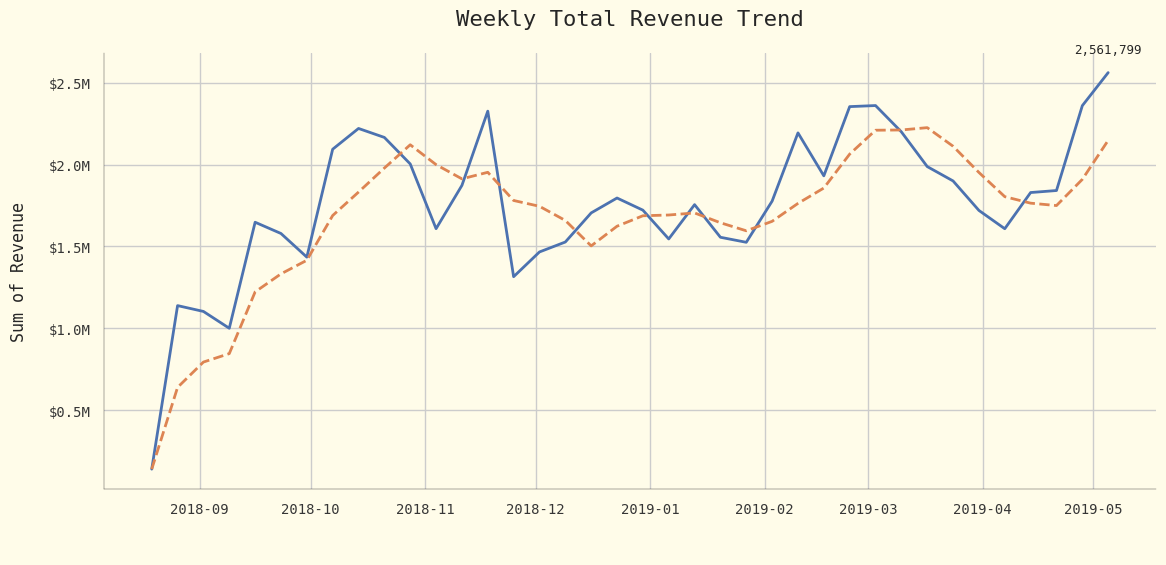

In [430]:

plot_time_trends(df_perf, 'date', 'revenue', 
                 agg_func='sum', freq='W', title='Weekly Total Revenue Trend', 
                 use_annot=True, show_moving_avg=True, format_y_as_money_millions=True)


In [431]:
def plot_weekly_revenue_by_region(all_regions=False):
    # Create weekly revenue by region
    weekly_revenue = df_perf.groupby(['date', 'region'])['revenue'].sum().unstack()
    weekly_revenue = weekly_revenue.resample('W').sum()
    colors = sns.color_palette('Paired')

    selected_regions = weekly_revenue.columns
    # Filter to only the selected regions
    if not all_regions:
        selected_regions = ['One', 'Two', 'Four']
        weekly_revenue = weekly_revenue[selected_regions]
        # Define a custom color list using the 'Paired' palette with as many colors as selected regions
        # Get the full 'Paired' palette and then select the 0th, 1st, and 3rd colors.
        colors = [colors[i] for i in [0, 1, 3]]

    # Calculate percentages based on filtered revenue
    weekly_percentages = weekly_revenue.div(weekly_revenue.sum(axis=1), axis=0) * 100

    # --- Plotting ---

    plt.figure(figsize=(20, 8))
    ax = weekly_revenue.plot(kind='bar', stacked=True, figsize=(12, 6), width=1, color=colors)

    # Remove the bar outlines by setting linewidth to 0 and edgecolor to "none"
    for patch in ax.patches:
        patch.set_linewidth(0)
        patch.set_edgecolor("none")

    # Create custom x-axis labels: only display the label once per month.
    labels = []
    prev_month = None
    for d in weekly_revenue.index:
        if prev_month != d.month:
            labels.append(d.strftime('%Y-%m'))
            prev_month = d.month
        else:
            labels.append('')
    ax.set_xticklabels(labels, rotation=0)

    # Add percentage labels with smaller font size and rotated 90 degrees
    for i, (idx, row) in enumerate(weekly_revenue.iterrows()):
        bottom = 0
        for region in selected_regions:
            if row[region] > 0:
                percentage = weekly_percentages.loc[idx, region]
                if percentage > 30:  # Show labels only for contributions above 30%
                    ax.text(
                        i, 
                        bottom + row[region] / 2,
                        f'{percentage:.0f}%',
                        ha='center', 
                        va='center', 
                        color='black',
                        fontsize=9,       # Smaller font size
                        rotation=0       # Rotate text by 90 degrees
                    )
            bottom += row[region]

    # Format the y-axis using a custom formatter to display revenue in K/M format
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(
        lambda x, pos: f'${x/1e6:,.1f}M' if x >= 1e6 
        else f'${x/1e3:,.0f}K' if x >= 1e3 
        else f'${x:,.0f}'
    ))

    # Set plot title, axis labels, and legend
    plt.xlabel('')
    plt.ylabel('Revenue')
    plt.title('Weekly Revenue by Region')
    plt.legend(title='Region', bbox_to_anchor=(0, 1), loc='upper left')

    # Remove top/right spines and adjust layout
    sns.despine()
    plt.tight_layout()
    plt.show()

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/3494682195.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_revenue = df_perf.groupby(['date', 'region'])['revenue'].sum().unstack()


<Figure size 2000x800 with 0 Axes>

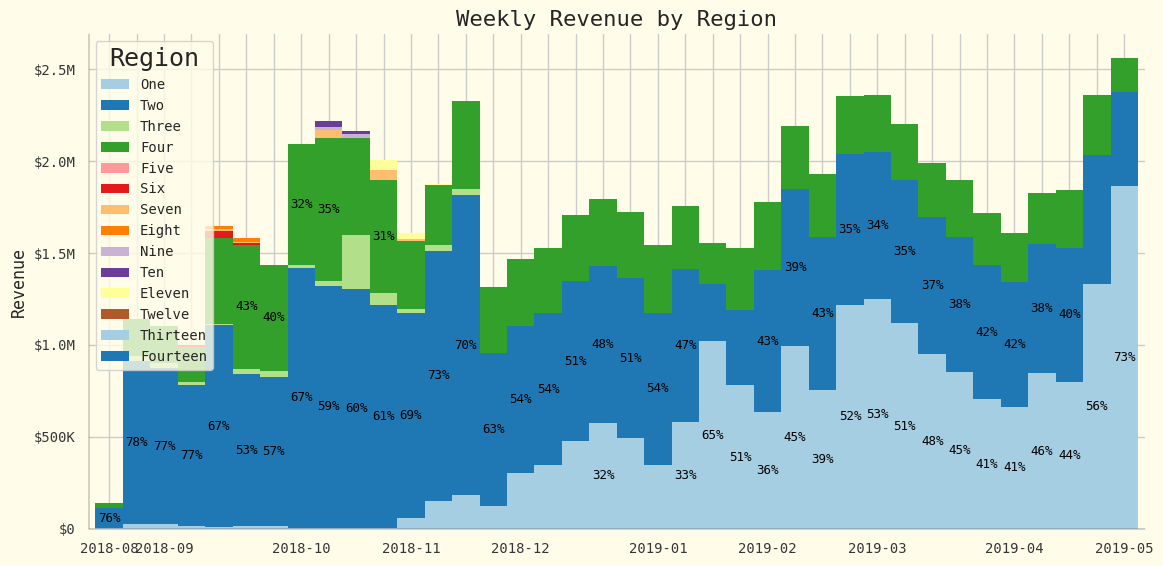

In [432]:
plot_weekly_revenue_by_region(all_regions=True)

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/3494682195.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_revenue = df_perf.groupby(['date', 'region'])['revenue'].sum().unstack()


<Figure size 2000x800 with 0 Axes>

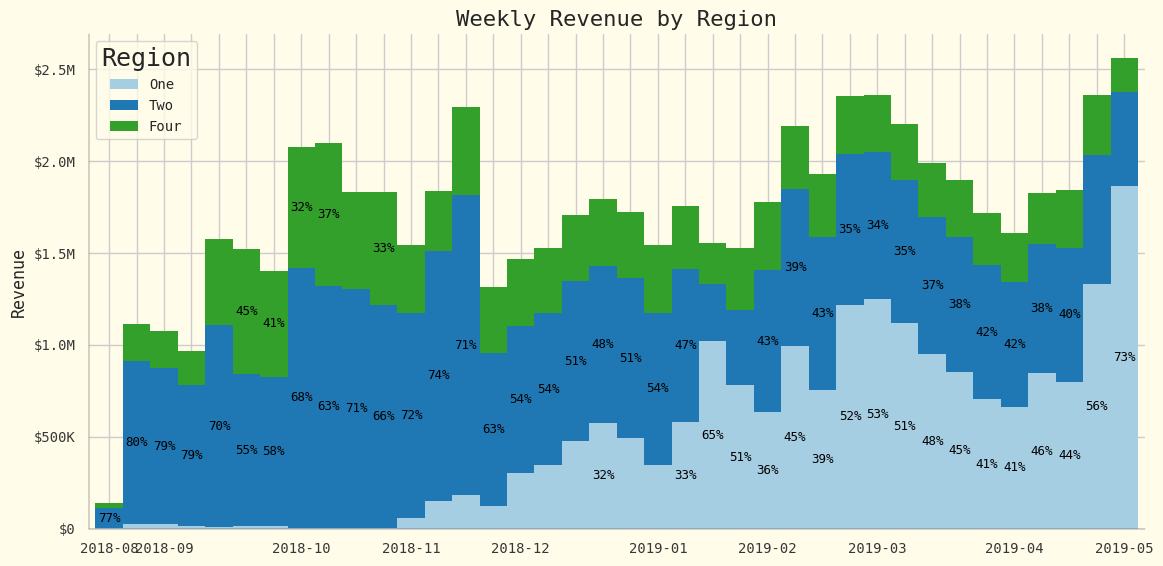

In [433]:
plot_weekly_revenue_by_region(all_regions=False)

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/2234318538.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = data_ts.groupby(group_by)[value_col].resample(freq).agg(agg_func).reset_index()


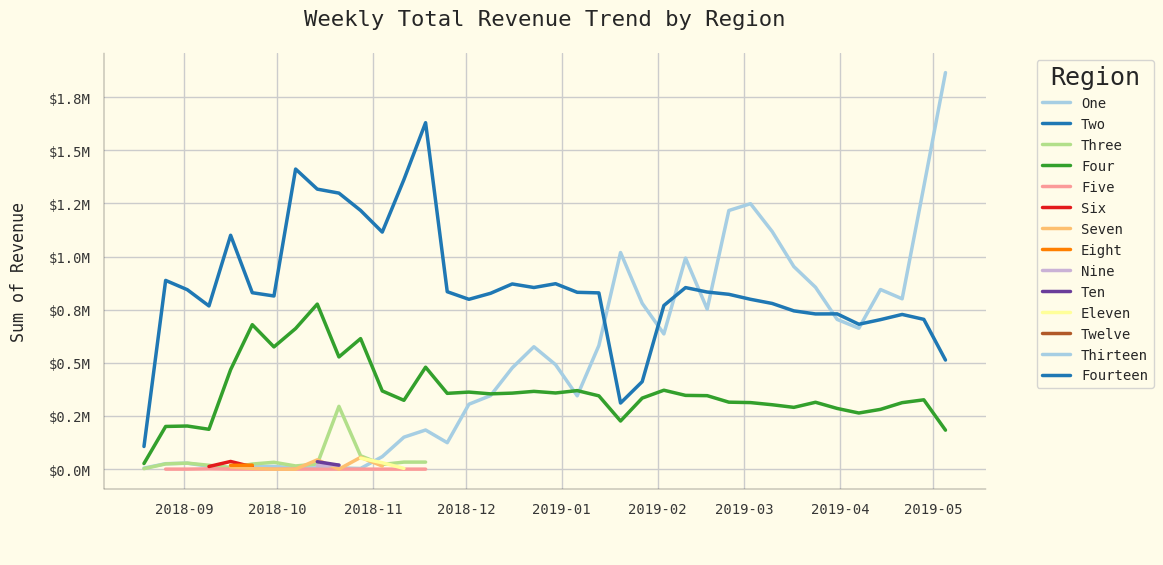

In [434]:
plot_time_trends(df_perf, 'date', 'revenue', agg_func='sum', freq='W', 
                 group_by='region', title='Weekly Total Revenue Trend by Region',
                 format_y_as_money_millions=True)

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/3849403490.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_cpm = df_perf.set_index('date').groupby('region')[['revenue', 'impressions']].resample('W').sum()


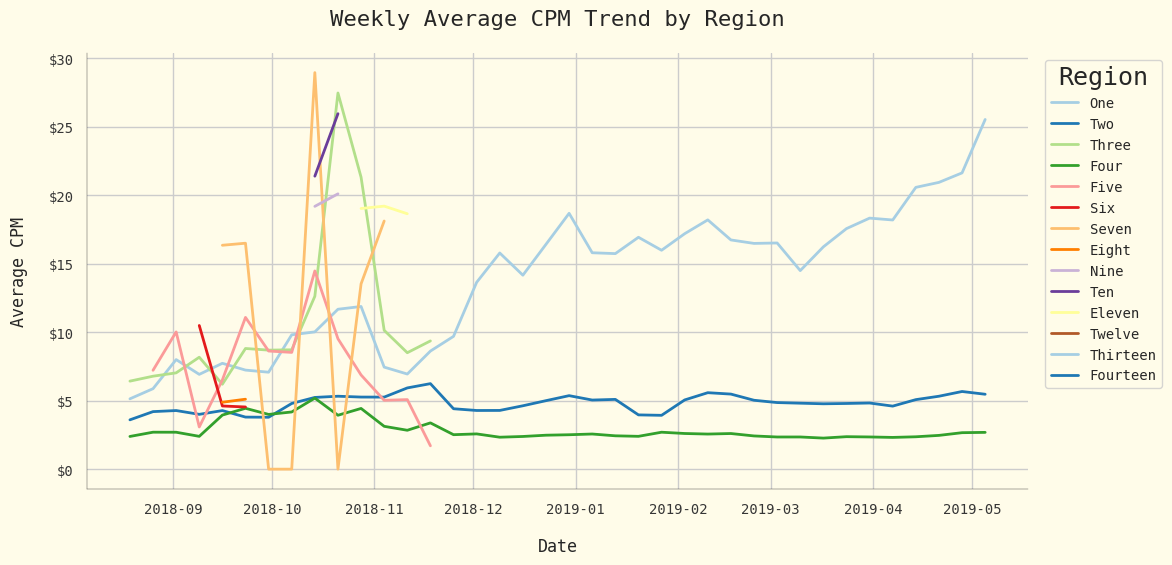

In [463]:
# Average CPM over Time (Weekly) - Use weighted average for accuracy
# We need to calculate weekly weighted avg CPM manually
weekly_cpm = df_perf.set_index('date').groupby('region')[['revenue', 'impressions']].resample('W').sum()
weekly_cpm['avg_cpm'] = (weekly_cpm['revenue'] / (weekly_cpm['impressions'] / 1000)).fillna(0)
weekly_cpm = weekly_cpm.reset_index()

fig, ax = plt.subplots()
sns.lineplot(data=weekly_cpm, x='date', y='avg_cpm', hue='region', ax=ax, palette='Paired')
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('$%.2f'))

# Adjust the figure size to make room for the legend
fig.set_size_inches(12, 6)

# Position the legend outside on the left
ax.legend(title='Region', 
          bbox_to_anchor=(1.15, 1),  # Position outside the plot on the right
          loc='upper right',  # Anchor point of the legend
          frameon=True, 
          framealpha=0.8)

# Adjust the plot to make room for the legend
plt.subplots_adjust(left=0.15)  # Increase left margin to make room for legend

finalize_plot(ax, title='Weekly Average CPM Trend by Region', xlabel='Date', ylabel='Average CPM', format_y_as_money=True)


/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/2234318538.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = data_ts.groupby(group_by)[value_col].resample(freq).agg(agg_func).reset_index()


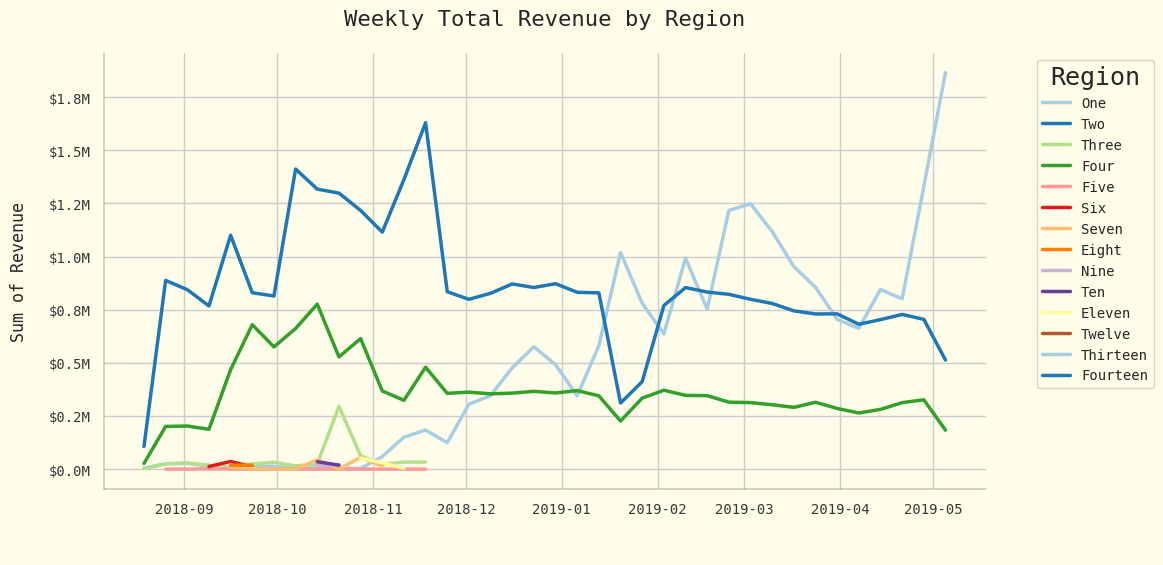

In [493]:
plot_time_trends(df_perf, 'date', 'revenue', agg_func='sum', freq='W', 
                 group_by='region', title='Weekly Total Revenue by Region',
                 format_y_as_money_millions=True)

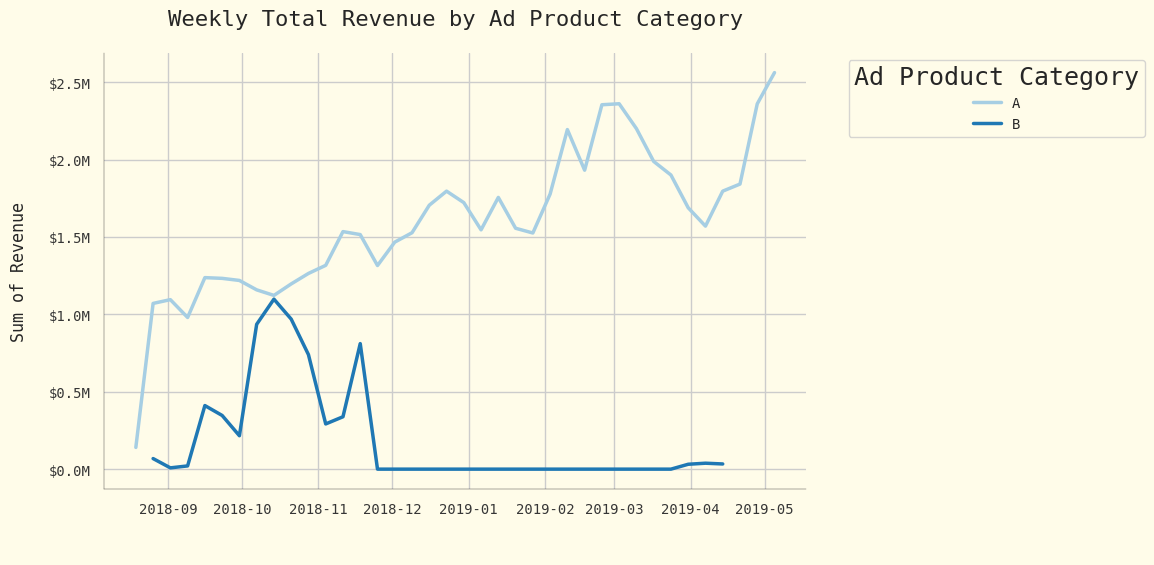

In [489]:
plot_time_trends(df_perf, 'date', 'revenue', agg_func='sum', freq='W', 
                 group_by='ad_product_category', title='Weekly Total Revenue by Ad Product Category',
                 format_y_as_money_millions=True)

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/2234318538.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = data_ts.groupby(group_by)[value_col].resample(freq).agg(agg_func).reset_index()


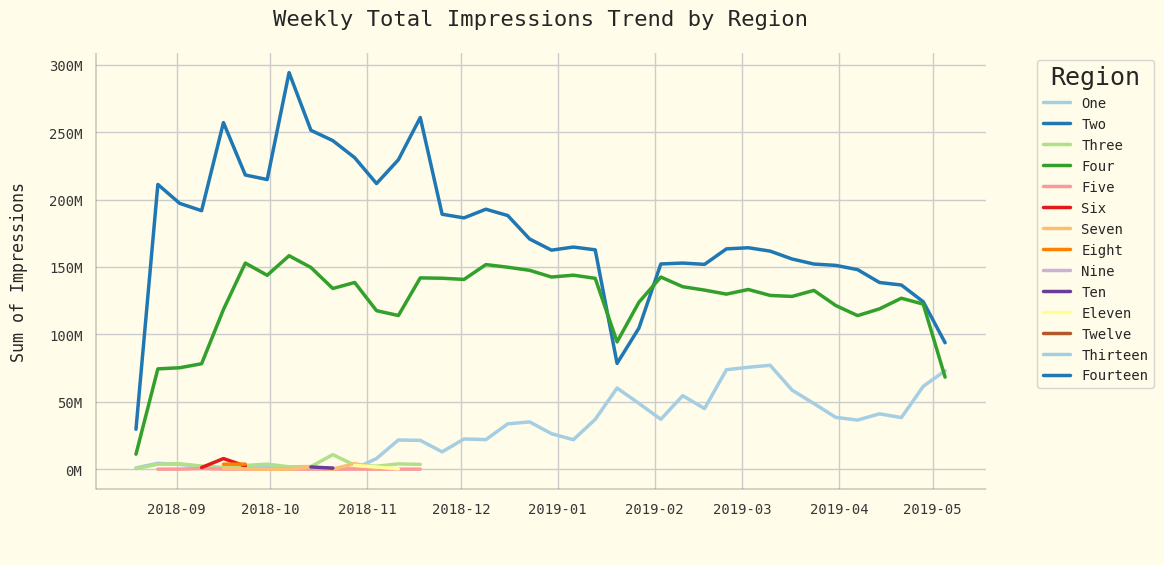

In [458]:
# Total Impressions over Time (Weekly)
plot_time_trends(df_perf, 'date', 'impressions', 
                 agg_func='sum', freq='W', group_by='region', title='Weekly Total Impressions Trend by Region', 
                 format_y_as_millions=True)

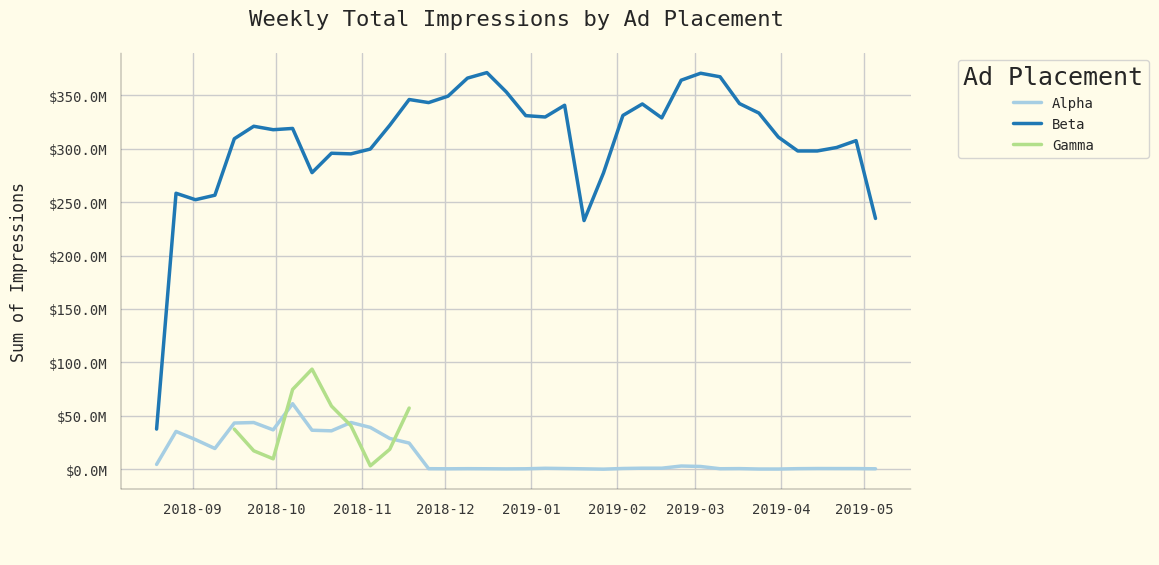

In [472]:
plot_time_trends(df_perf, 'date', 'impressions', agg_func='sum', freq='W', 
                 group_by='ad_placement', title='Weekly Total Impressions by Ad Placement',
                 format_y_as_money_millions=True)

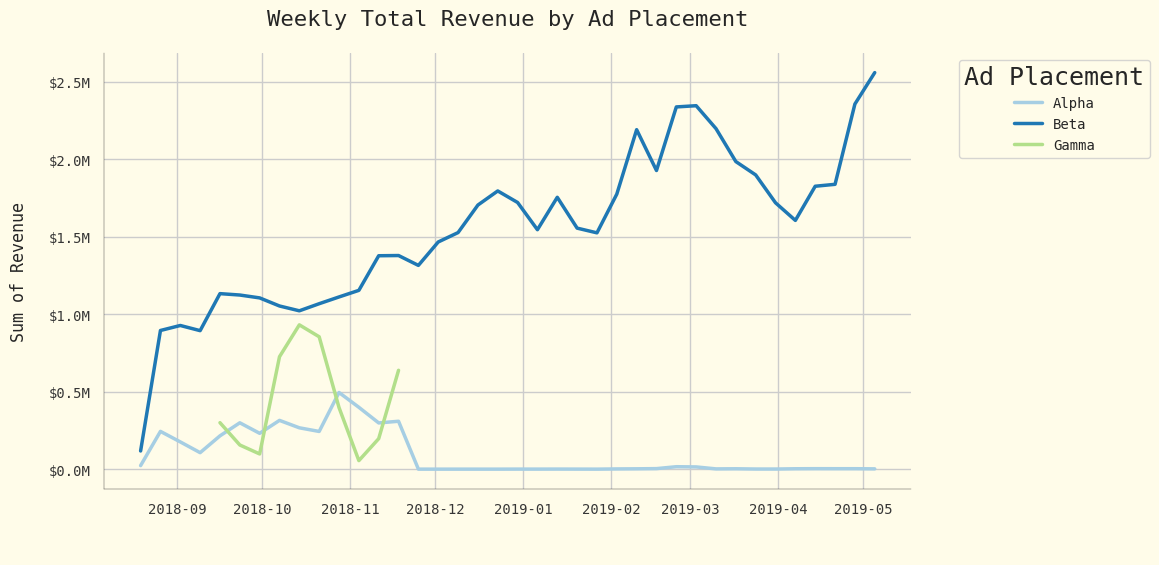

In [471]:
plot_time_trends(df_perf, 'date', 'revenue', agg_func='sum', freq='W', 
                 group_by='ad_placement', title='Weekly Total Revenue by Ad Placement',
                 format_y_as_money_millions=True)

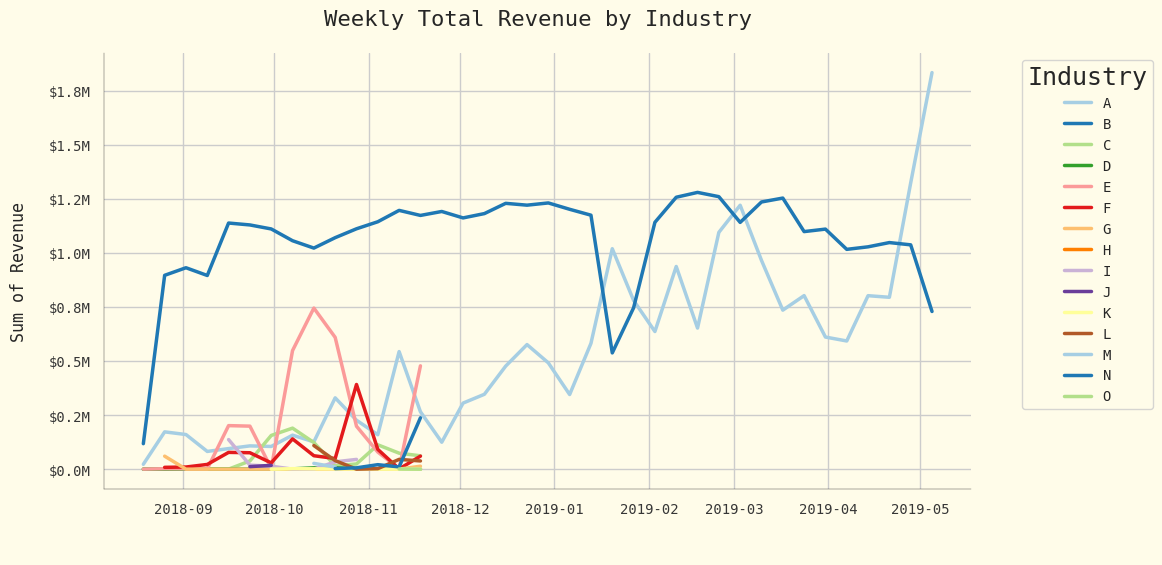

In [473]:
plot_time_trends(df_perf, 'date', 'revenue', agg_func='sum', freq='W', 
                 group_by='industry', title='Weekly Total Revenue by Industry',
                 format_y_as_money_millions=True)

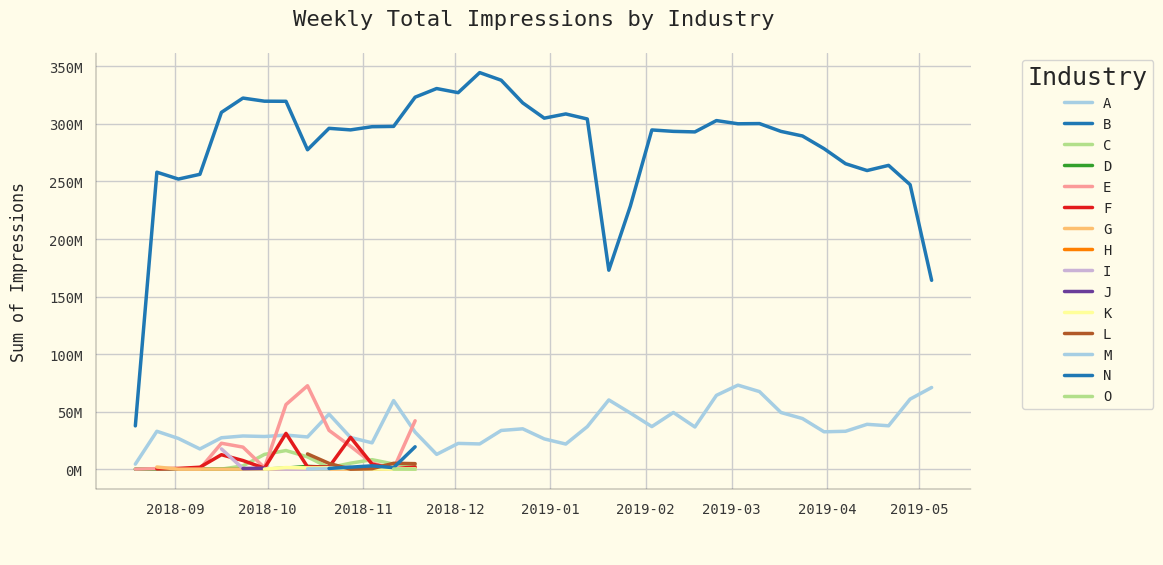

In [478]:
plot_time_trends(df_perf, 'date', 'impressions', agg_func='sum', freq='W', 
                 group_by='industry', title='Weekly Total Impressions by Industry',
                 format_y_as_millions=True)

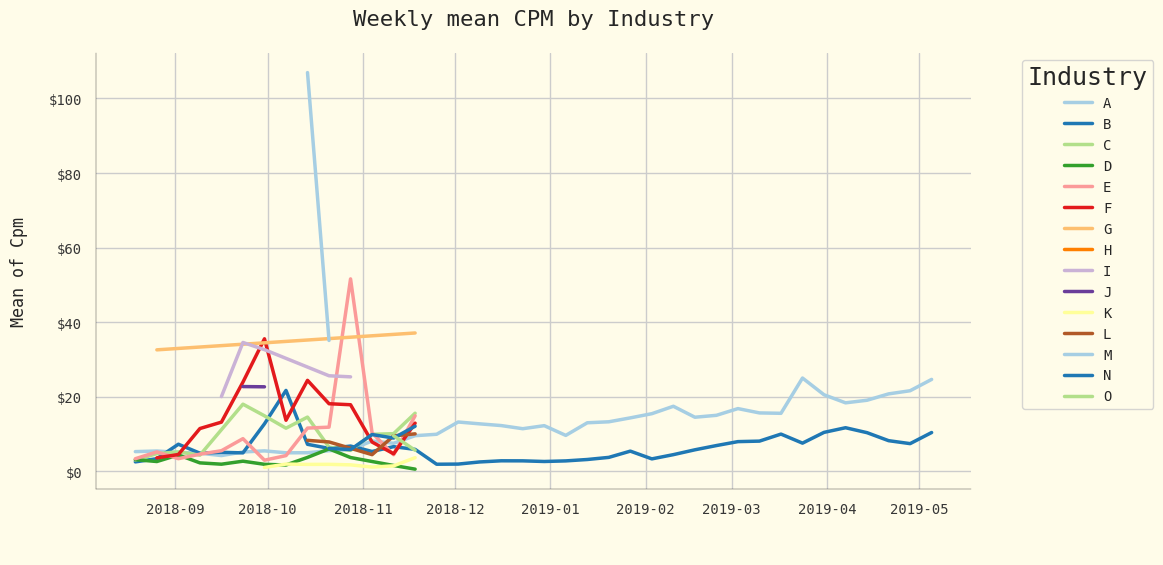

In [480]:
plot_time_trends(df_perf, 'date', 'cpm', agg_func='mean', freq='W', 
                 group_by='industry', title='Weekly mean CPM by Industry',
                 format_y_as_money=True)

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/2300985211.py:31: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(filtered_data[cat_col]):


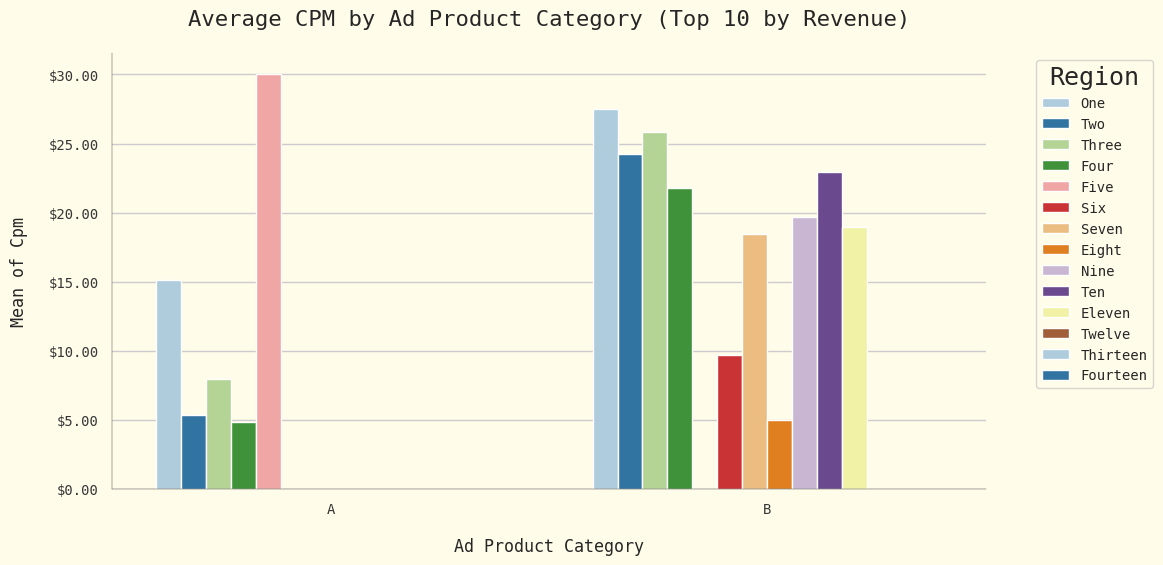

In [ ]:
# Average CPM by Ad Product Category (Top 10 by Revenue)
top_10_products = df_perf.groupby('ad_product_category')['revenue'].sum().nlargest(10).index
plot_categorical_distribution(df_perf[df_perf['ad_product_category'].isin(top_10_products)],
                              'ad_product_category', 'cpm', hue='region', agg_func='mean',
                              title='Average CPM by Ad Product Category (Top 10 by Revenue)')

* seasonally adjustment test

## Understanding Seasonal Adjustment in Revenue Analysis

Seasonal adjustment is crucial in our revenue analysis for several reasons:

### Why Seasonal Adjustment Matters

1. **True Trend Identification**: 
   - Raw revenue data often contains regular, predictable patterns (seasonality) that can mask the underlying trend
   - By removing these seasonal effects, we can better identify the true direction and magnitude of revenue changes
   - This helps distinguish between actual growth/decline and regular seasonal fluctuations

2. **Comparable Period Analysis**:
   - Enables fair comparison between different time periods
   - For example, comparing Q1 2023 to Q1 2024 becomes more meaningful when seasonal effects are removed
   - Helps identify if changes are due to business performance or just seasonal patterns

3. **Forecasting Accuracy**:
   - Separates the signal (trend) from the noise (seasonality and random fluctuations)
   - Provides a cleaner base for predictive modeling
   - Reduces forecast error by accounting for known seasonal patterns

### Mathematical Foundation

The additive decomposition model we're using can be expressed as:

\[ Y_t = T_t + S_t + R_t \]

Where:
- \( Y_t \) = Original time series (observed revenue)
- \( T_t \) = Trend component
- \( S_t \) = Seasonal component
- \( R_t \) = Residual component (random fluctuations)

The seasonally adjusted series is then:

\[ Y_t^{SA} = Y_t - S_t = T_t + R_t \]

Key calculations in our analysis:

1. **Moving Average (Trend)**:
   \[ T_t = \frac{1}{m}\sum_{i=-(m-1)/2}^{(m-1)/2} Y_{t+i} \]
   where \( m \) is the window size (4 weeks in our case)

2. **Seasonal Component**:
   \[ S_t = Y_t - T_t \]
   then averaged across similar periods

3. **Residual Component**:
   \[ R_t = Y_t - T_t - S_t \]

4. **Month-over-Month (MoM) Variance**:
   \[ \text{MoM}_t = \left(\frac{Y_t}{Y_{t-1}} - 1\right) \times 100\% \]

### Practical Implications for Our Data

1. **Revenue Pattern Recognition**:
   - The seasonal component helps identify regular patterns in revenue generation
   - The trend component shows the underlying business growth/decline
   - Residuals help identify unusual events or outliers

2. **Business Decision Making**:
   - Helps distinguish between seasonal effects and actual performance changes
   - Enables more accurate target setting and performance evaluation
   - Provides insights for resource allocation and planning

3. **Performance Evaluation**:
   - Seasonally adjusted data provides a fairer basis for comparing performance across periods
   - Helps identify if changes are due to business decisions or seasonal patterns
   - Enables better understanding of true business growth

The 4-week period we've chosen is particularly relevant for our analysis because:
- It captures monthly business cycles
- Aligns with typical billing and reporting periods
- Provides enough data points for meaningful seasonal patterns while maintaining resolution


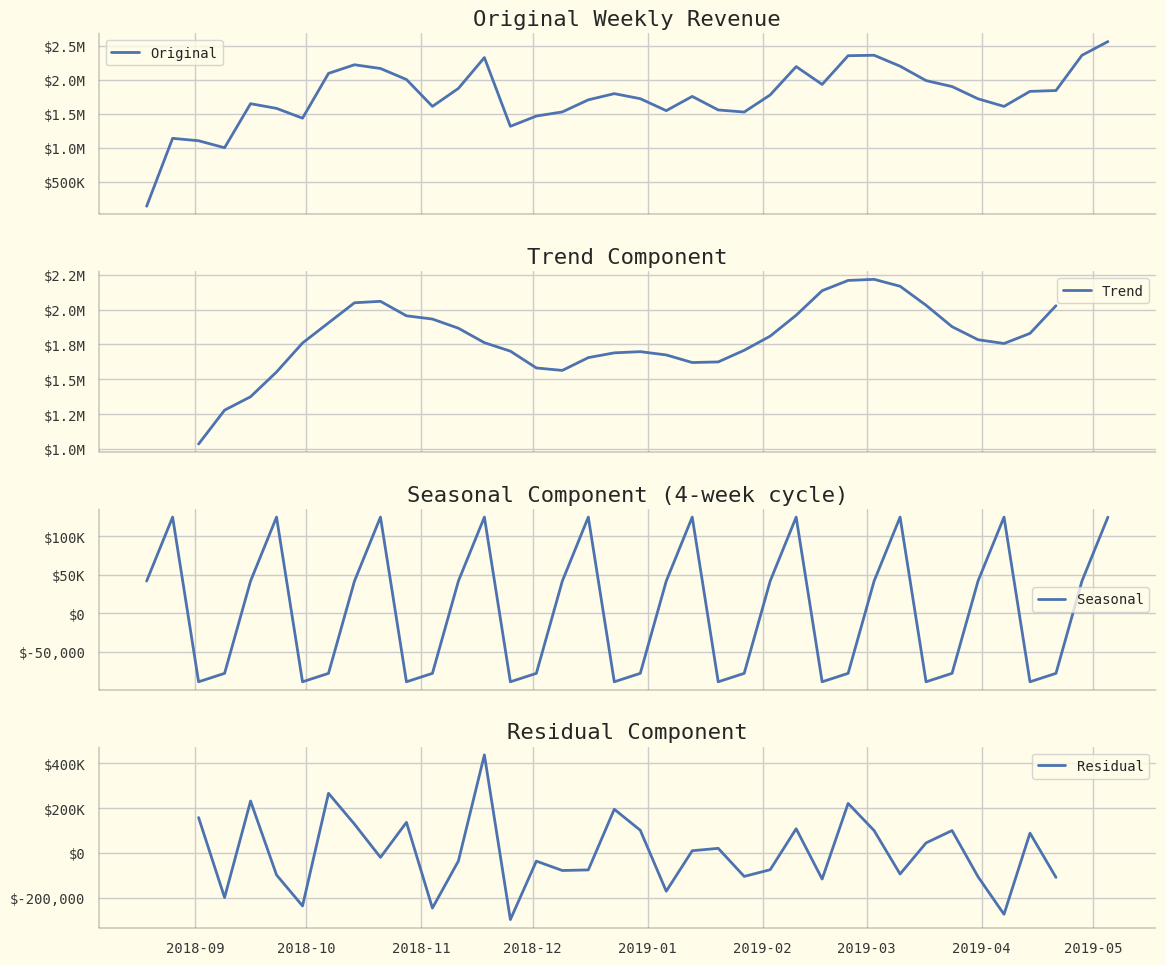

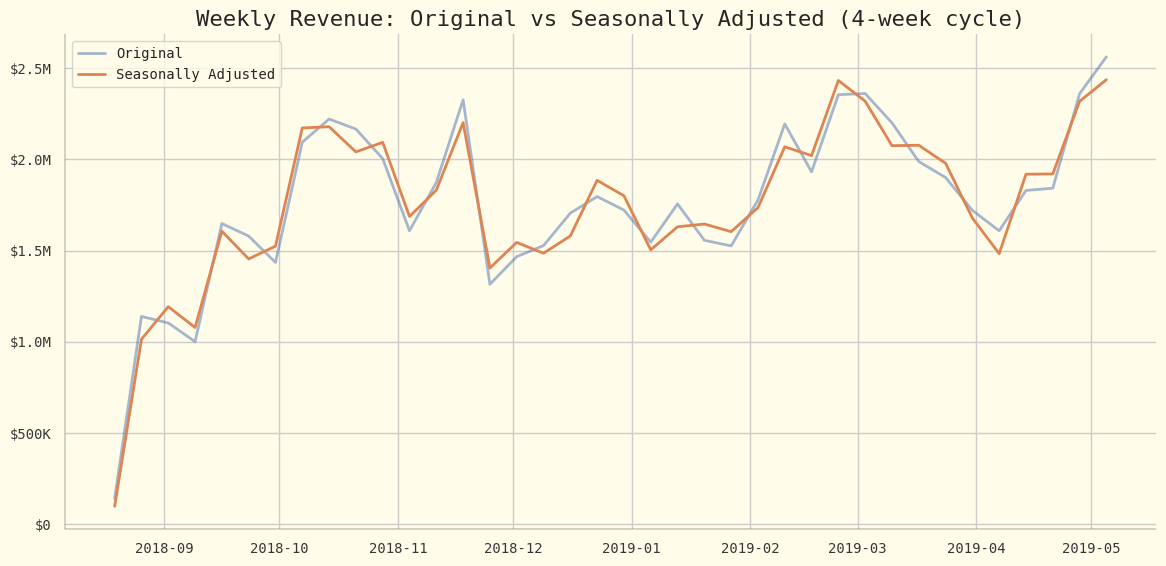


Seasonal Analysis Statistics (4-week cycle):
Average Seasonal Component: $4,398.55
Maximum Seasonal Effect: $125,159.67
Minimum Seasonal Effect: $-89,068.93
Seasonal Range: $214,228.60


In [445]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Prepare the time series data
weekly_revenue = df_perf.set_index('date').resample('W')['revenue'].sum()

# Perform seasonal decomposition with a 4-week period
decomposition = seasonal_decompose(weekly_revenue, model='additive', period=4)

# Create a figure with subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot the original data
ax1.plot(weekly_revenue.index, weekly_revenue, label='Original')
ax1.set_title('Original Weekly Revenue')
ax1.legend()
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, pos: f'${x/1e6:,.1f}M' if x >= 1e6 else f'${x/1e3:,.0f}K' if x >= 1e3 else f'${x:,.0f}'
))

# Plot the trend component
ax2.plot(weekly_revenue.index, decomposition.trend, label='Trend')
ax2.set_title('Trend Component')
ax2.legend()
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, pos: f'${x/1e6:,.1f}M' if x >= 1e6 else f'${x/1e3:,.0f}K' if x >= 1e3 else f'${x:,.0f}'
))

# Plot the seasonal component
ax3.plot(weekly_revenue.index, decomposition.seasonal, label='Seasonal')
ax3.set_title('Seasonal Component (4-week cycle)')
ax3.legend()
ax3.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, pos: f'${x/1e6:,.1f}M' if x >= 1e6 else f'${x/1e3:,.0f}K' if x >= 1e3 else f'${x:,.0f}'
))

# Plot the residual component
ax4.plot(weekly_revenue.index, decomposition.resid, label='Residual')
ax4.set_title('Residual Component')
ax4.legend()
ax4.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, pos: f'${x/1e6:,.1f}M' if x >= 1e6 else f'${x/1e3:,.0f}K' if x >= 1e3 else f'${x:,.0f}'
))

# Format the plot
plt.tight_layout()
sns.despine()

# Create seasonally adjusted version
seasonally_adjusted = weekly_revenue - decomposition.seasonal

# Plot original vs seasonally adjusted
plt.figure(figsize=(12, 6))
plt.plot(weekly_revenue.index, weekly_revenue, label='Original', alpha=0.5)
plt.plot(seasonally_adjusted.index, seasonally_adjusted, label='Seasonally Adjusted')
plt.title('Weekly Revenue: Original vs Seasonally Adjusted (4-week cycle)')
plt.legend()
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, pos: f'${x/1e6:,.1f}M' if x >= 1e6 else f'${x/1e3:,.0f}K' if x >= 1e3 else f'${x:,.0f}'
))
sns.despine()
plt.tight_layout()
plt.show()

# Print seasonal statistics
print("\nSeasonal Analysis Statistics (4-week cycle):")
print(f"Average Seasonal Component: ${decomposition.seasonal.mean():,.2f}")
print(f"Maximum Seasonal Effect: ${decomposition.seasonal.max():,.2f}")
print(f"Minimum Seasonal Effect: ${decomposition.seasonal.min():,.2f}")
print(f"Seasonal Range: ${decomposition.seasonal.max() - decomposition.seasonal.min():,.2f}")

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/52618339.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df_perf.set_index('date').resample('M')['revenue'].sum()


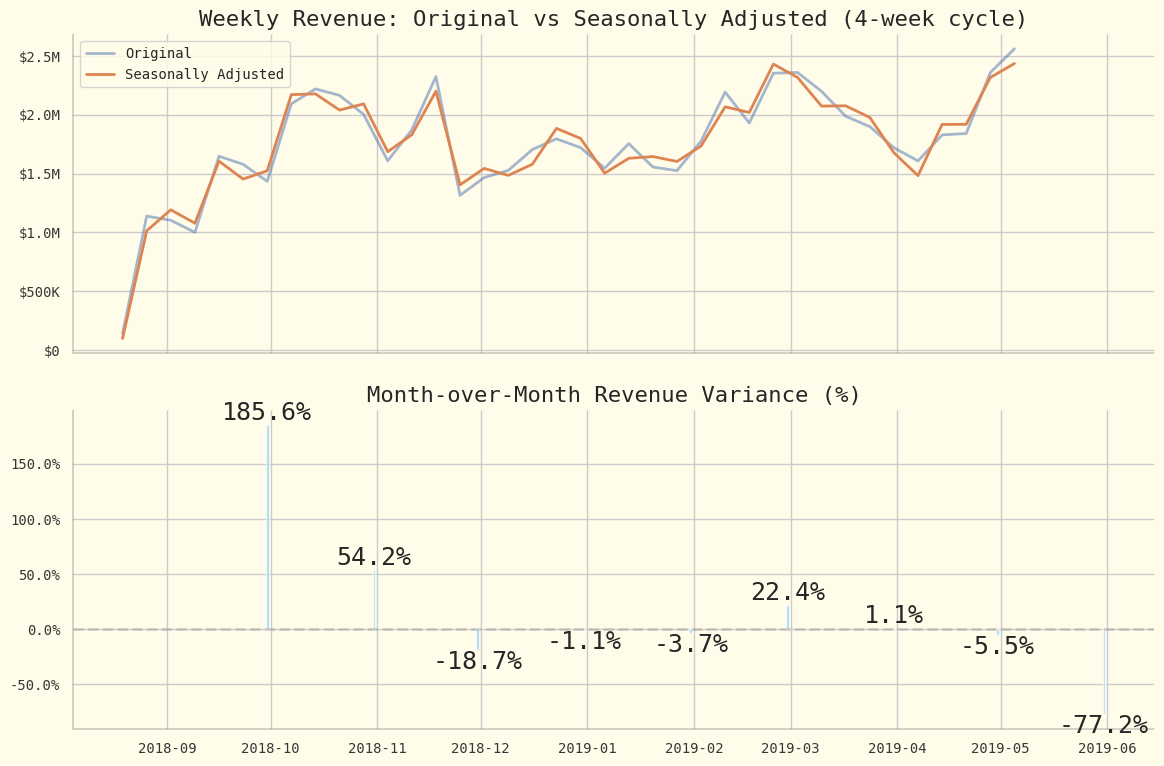


Month-over-Month Variance Statistics:
Average MoM Change: 17.43%
Maximum MoM Increase: 185.55%
Maximum MoM Decrease: -77.18%
Standard Deviation: 72.01%


In [508]:
# Calculate month-over-month variance
monthly_revenue = df_perf.set_index('date').resample('M')['revenue'].sum()
mom_variance = monthly_revenue.pct_change() * 100

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot original vs seasonally adjusted
ax1.plot(weekly_revenue.index, weekly_revenue, label='Original', alpha=0.5)
ax1.plot(seasonally_adjusted.index, seasonally_adjusted, label='Seasonally Adjusted')
ax1.set_title('Weekly Revenue: Original vs Seasonally Adjusted (4-week cycle)')
ax1.legend()
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, pos: f'${x/1e6:,.1f}M' if x >= 1e6 else f'${x/1e3:,.0f}K' if x >= 1e3 else f'${x:,.0f}'
))

# Plot MoM variance
ax2.bar(mom_variance.index, mom_variance, color='skyblue', alpha=0.7)
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
ax2.set_title('Month-over-Month Revenue Variance (%)')
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f%%'))

# Add value labels to MoM bars
for i, v in enumerate(mom_variance):
    if not pd.isna(v):
        ax2.text(mom_variance.index[i], v, 
                f'{v:.1f}%', 
                ha='center', 
                va='bottom' if v >= 0 else 'top')

# Format the plots
sns.despine()
plt.tight_layout()
plt.show()

# Print MoM statistics
print("\nMonth-over-Month Variance Statistics:")
print(f"Average MoM Change: {mom_variance.mean():.2f}%")
print(f"Maximum MoM Increase: {mom_variance.max():.2f}%")
print(f"Maximum MoM Decrease: {mom_variance.min():.2f}%")
print(f"Standard Deviation: {mom_variance.std():.2f}%")

* Plotting Categorical Distributions

In [459]:
def plot_categorical_distribution(data, cat_col, value_col, agg_func='sum',
                                  hue=None, top_n=15, title=None, xlabel=None,
                                  ylabel=None, use_annot=True, annot_fmt="{:,.0f}",
                                  filter_dict=None, show_percentages=False,
                                  palette='Paired', 
                                  **finalize_kwargs):
    """Plots aggregated distribution for a categorical variable, optionally filtered and with hue."""

    # Apply filters if provided
    filtered_data = data.copy()
    
    # if hue != 'region':
    #     filtered_data['region'] = filtered_data['region'].astype(str)

    if filter_dict:
        for col, values in filter_dict.items():
            if isinstance(values, list):
                filtered_data = filtered_data[filtered_data[col].isin(values)]
            else:
                filtered_data = filtered_data[filtered_data[col] == values]
        print(f"Plotting with filters applied: {filter_dict}. Resulting shape: {filtered_data.shape}")
        if filtered_data.empty:
            print("Warning: Filter resulted in empty data.")
            return

    if filtered_data.empty:
         print(f"Warning: No data available for plotting {cat_col} vs {value_col}.")
         return

    # Convert categorical column to string if it's categorical
    if pd.api.types.is_categorical_dtype(filtered_data[cat_col]):
        filtered_data[cat_col] = filtered_data[cat_col].astype(str)

    # Group data and aggregate
    group_cols = [cat_col]
    if hue:
        group_cols.append(hue)
    
    # Aggregate the data
    agg_data = filtered_data.groupby(group_cols, observed=True)[value_col].agg(agg_func).reset_index()

    # Calculate percentages if requested
    if show_percentages and hue:
        # Calculate total for each category
        totals = agg_data.groupby(cat_col)[value_col].transform('sum')
        # Calculate percentages
        agg_data['percentage'] = (agg_data[value_col] / totals * 100).round(1)
        # Add percentage to value for annotation
        agg_data['value_with_percent'] = agg_data.apply(
            lambda x: f"{x[value_col]:,.0f} ({x['percentage']}%)", axis=1
        )

    # Sort and get top N if applicable (based on the value column)
    # Sort aggregated values first, then maybe by category name if needed
    agg_data = agg_data.sort_values(by=value_col, ascending=False)

    # Get Top N categories based on the primary categorical column
    if top_n and agg_data[cat_col].nunique() > top_n:
        top_categories = agg_data.groupby(cat_col)[value_col].sum().nlargest(top_n).index
        agg_data = agg_data[agg_data[cat_col].isin(top_categories)]

    # Default labels and title
    if xlabel is None:
        xlabel = cat_col.replace('_', ' ').title()
    if ylabel is None:
        ylabel = f"{agg_func.capitalize()} of {value_col.replace('_', ' ').title()}"
    if title is None:
        title = f"{ylabel} by {xlabel}"
        if hue:
             title += f" and {hue.replace('_', ' ').title()}"
        if filter_dict:
            title += f" (Filtered)"

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
        
    # If plotting with hue, determine custom palette if hue is 'region'
    if hue == 'region' or cat_col == 'region':
        # Use the region ordering from the original data (assumed ordered categorical)
        cat_order = data['region'].cat.categories.tolist()
        custom_palette = {cat: col for cat, col in zip(cat_order, sns.color_palette(palette, len(cat_order)))}
    else:
        custom_palette = palette

    # Determine order for plotting
    plot_order = agg_data.groupby(cat_col, observed=True)[value_col].sum().sort_values(ascending=False).index if not hue else None

    # Create the barplot
    if hue:
        sns.barplot(
            data=agg_data,
            x=cat_col, 
            y=value_col,
            hue=hue,
            ax=ax,
            order=plot_order,
            palette=custom_palette  # Add palette parameter here
        )
        
        # Add annotations with percentages if requested
        if show_percentages and use_annot:
            for container in ax.containers:
                ax.bar_label(container, labels=agg_data['value_with_percent'], 
                             label_type='edge', padding=2)
    else:
        sns.barplot(
            data=agg_data,
            x=cat_col, 
            y=value_col,
            ax=ax,
            order=plot_order,
            palette=custom_palette  # Add palette parameter here
        )
        
        # Add regular annotations if no hue
        if use_annot:
            try:
                if agg_func == 'mean' or value_col == 'cpm':
                    fmt = "{:,.2f}"  # Use 2 decimal places for means/CPM
                else:
                    fmt = annot_fmt  # Use default/provided format for sums/counts
                add_annotations(ax, fmt=fmt, is_bar=True)
            except Exception as e:
                print(f"Could not add annotations: {e}")

    # Formatting
    ax.tick_params(axis='x', rotation=0)
    if value_col == 'revenue' or agg_func == 'sum':  # Format y-axis for large numbers
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(
            lambda x, pos: f'${x/1e6:,.1f}M' if x >= 1e6 else f'${x/1e3:,.0f}K' if x >= 1e3 else f'${x:,.0f}'
        ))
    elif value_col == 'cpm':  # Format y-axis as currency for CPM
        ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('$%.2f'))

    if hue:
        ax.legend(title=hue.replace('_', ' ').title(), 
                 bbox_to_anchor=(1.05, 1), 
                 loc='upper left',
                 frameon=True,
                 framealpha=0.8)

    finalize_plot(
        ax, 
        title=title, 
        xlabel=xlabel, 
        ylabel=ylabel,
        **finalize_kwargs
    )

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/78507419.py:31: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(filtered_data[cat_col]):
/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/78507419.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


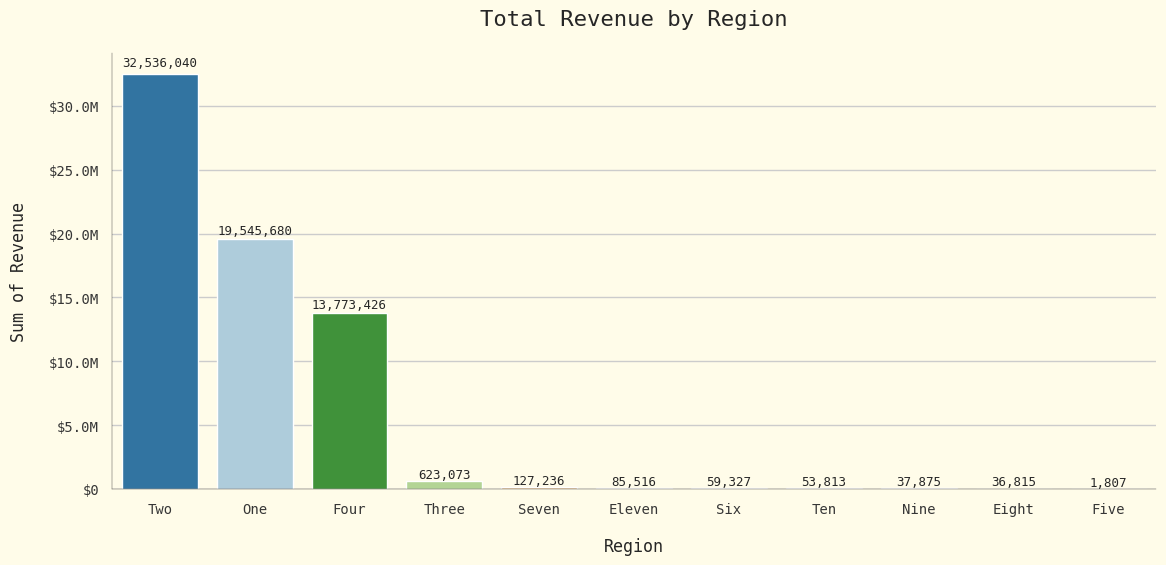

In [460]:
# Total Revenue by Region
plot_categorical_distribution(df_perf, 'region', 'revenue', agg_func='sum', title='Total Revenue by Region')


/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/4108222651.py:67: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(


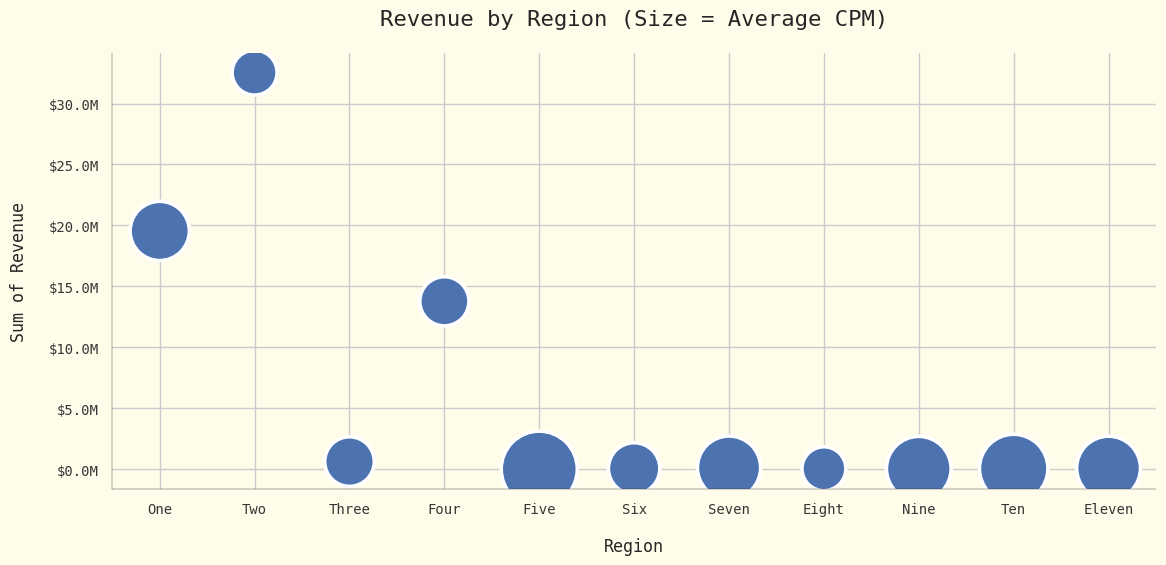

<Figure size 1200x600 with 0 Axes>

In [505]:
def plot_categorical_scatter(data, x_col, y_col, size_col, agg_func='sum',
                           agg_size_func='sum', hue=None, top_n=15, title=None, 
                           xlabel=None, ylabel=None, size_label=None, palette='viridis',
                           size_scale=1000, filter_dict=None, show_percentages=False, 
                           **finalize_kwargs):
    """
    Creates a scatter plot for categorical variables with grouping features.
    """
    
    # Apply filters if provided
    filtered_data = data.copy()
    if filter_dict:
        for col, values in filter_dict.items():
            if isinstance(values, list):
                filtered_data = filtered_data[filtered_data[col].isin(values)]
            else:
                filtered_data = filtered_data[filtered_data[col] == values]
        print(f"Plotting with filters applied: {filter_dict}. Resulting shape: {filtered_data.shape}")
        if filtered_data.empty:
            print("Warning: Filter resulted in empty data.")
            return

    if filtered_data.empty:
        print(f"Warning: No data available for plotting.")
        return

    # Group data and aggregate
    group_cols = [x_col]
    if hue:
        group_cols.append(hue)
    
    # Aggregate the data with different functions for y and size
    agg_data = filtered_data.groupby(group_cols, observed=True).agg({
        y_col: agg_func,
        size_col: agg_size_func
    }).reset_index()

    # Calculate percentages if requested
    if show_percentages and hue:
        totals = agg_data.groupby(x_col)[y_col].transform('sum')
        agg_data['percentage'] = (agg_data[y_col] / totals * 100).round(1)

    # Sort and get top N if applicable
    agg_data = agg_data.sort_values(by=y_col, ascending=False)
    if top_n and agg_data[x_col].nunique() > top_n:
        top_categories = agg_data.groupby(x_col)[y_col].sum().nlargest(top_n).index
        agg_data = agg_data[agg_data[x_col].isin(top_categories)]

    # Default labels and title
    if xlabel is None:
        xlabel = x_col.replace('_', ' ').title()
    if ylabel is None:
        ylabel = f"{agg_func.capitalize()} of {y_col.replace('_', ' ').title()}"
    if size_label is None:
        size_label = f"{agg_size_func.capitalize()} {size_col.replace('_', ' ').title()}"
    if title is None:
        title = f"{ylabel} by {xlabel} (Size = {size_label})"
        if hue:
            title += f" and {hue.replace('_', ' ').title()}"
        if filter_dict:
            title += f" (Filtered)"

    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Create scatter plot with solid colors and no legend box
    scatter = sns.scatterplot(
        data=agg_data,
        x=x_col,
        y=y_col,
        size=size_col,
        hue=hue,
        sizes=(size_scale, size_scale * 3),
        palette=palette,
        legend=False  # Remove legend
    )
    
    # Format y-axis if it's money
    if y_col == 'cpm' or y_col == 'revenue':
        plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(
            lambda x, pos: f'${x/1e6:,.1f}M' if x >= 1e6 else f'${x/1e3:,.0f}K' if x >= 1e3 else f'${x:,.0f}'
        ))
    
    # Add percentage annotations if requested
    if show_percentages and hue:
        for i, row in agg_data.iterrows():
            plt.annotate(
                f"{row['percentage']}%",
                (row[x_col], row[y_col]),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center'
            )
    
    # Finalize plot
    finalize_plot(
        plt.gca(),
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        **finalize_kwargs
    )
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_categorical_scatter(
    df_perf,
    x_col='region',
    y_col='revenue',
    size_col='cpm',
    agg_func='sum',
    agg_size_func='mean',  # Different aggregation for size
    title='Revenue by Region (Size = Average CPM)',
    format_y_as_money_millions=True
)

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/78507419.py:31: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(filtered_data[cat_col]):
/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/78507419.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


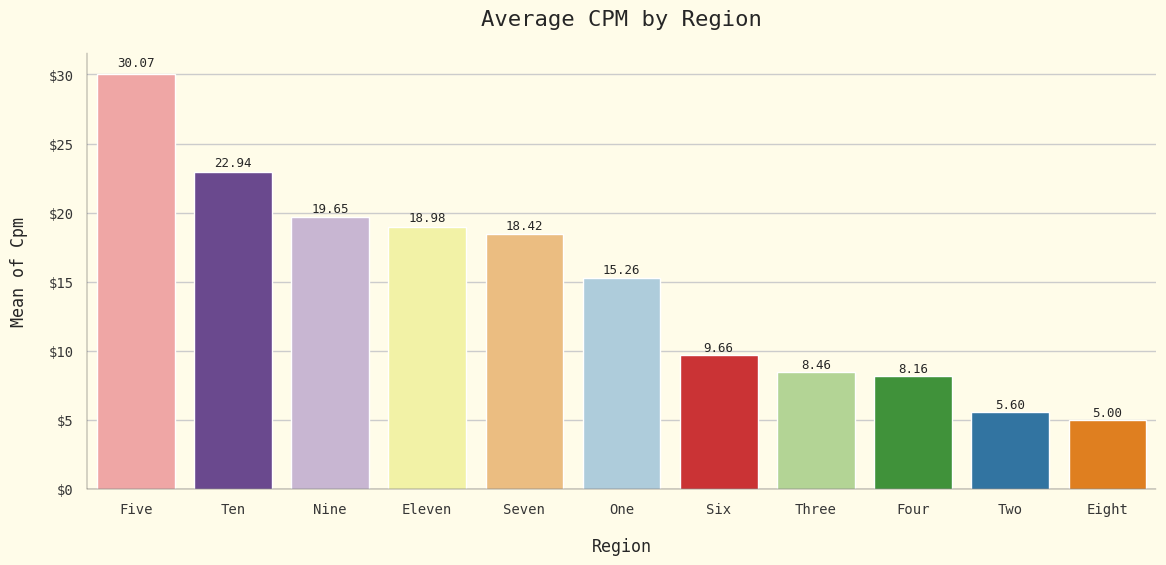

In [495]:
# Average CPM by Region (Weighted)
plot_categorical_distribution(df_perf, 'region', 'cpm', agg_func='mean', title='Average CPM by Region', format_y_as_money=True)

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/78507419.py:31: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(filtered_data[cat_col]):


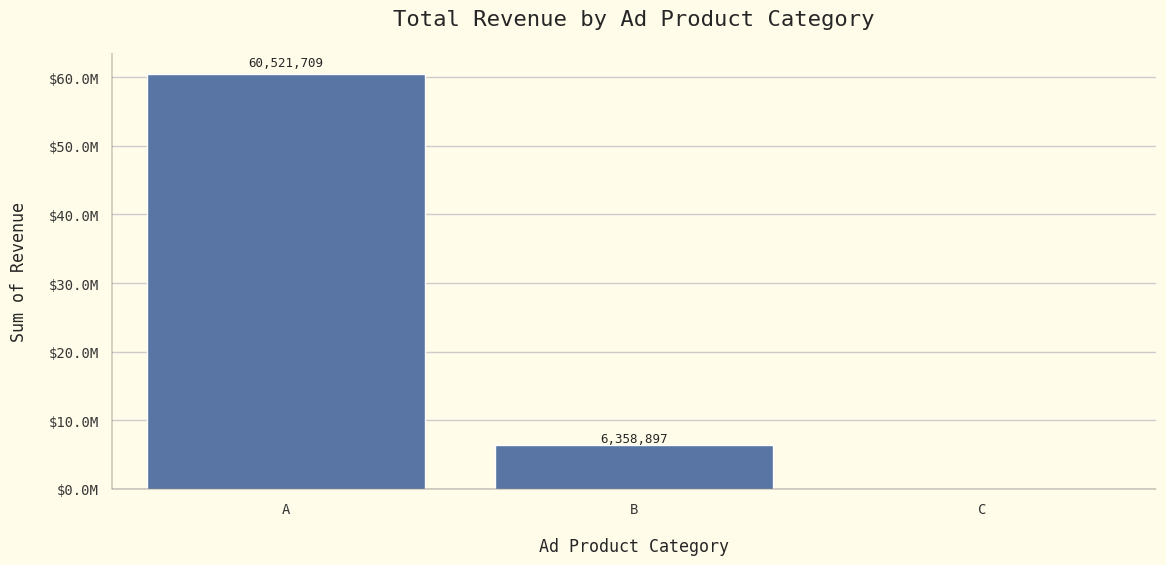

In [465]:
plot_categorical_distribution(df, 'ad_product_category', 'revenue', agg_func='sum', title='Total Revenue by Ad Product Category', palette=None, format_y_as_money_millions=True)

In [441]:
df[df['ad_product_category'] == 'A'].revenue.sum() / df.revenue.sum()

np.float64(0.9049216618562734)

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/2300985211.py:31: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(filtered_data[cat_col]):


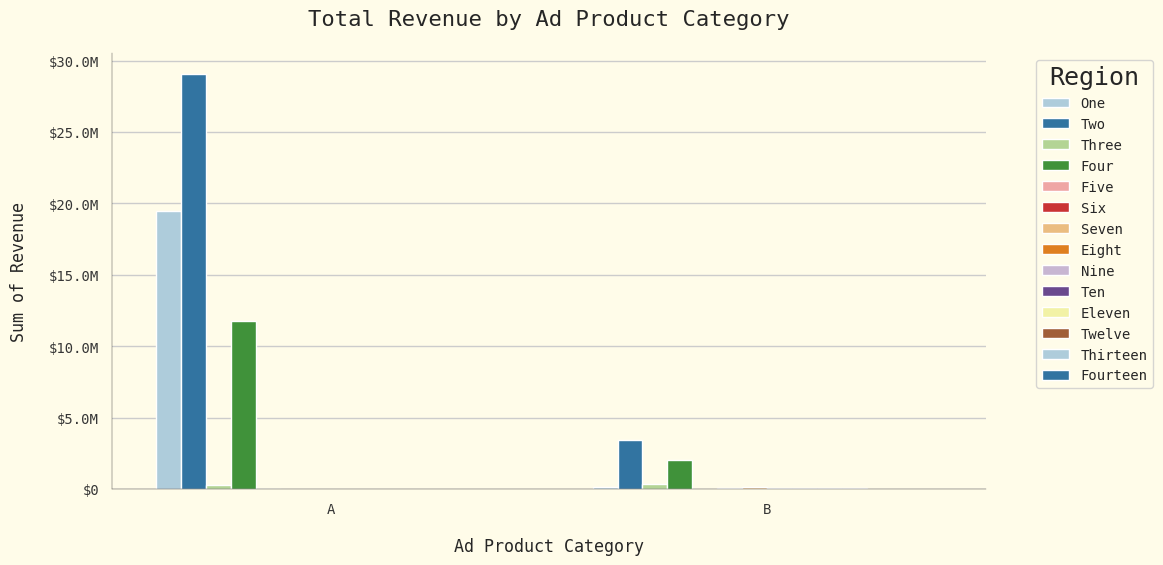

In [436]:
# Total Revenue by Ad Product Category
plot_categorical_distribution(df_perf, 'ad_product_category', 'revenue', hue='region', agg_func='sum', title='Total Revenue by Ad Product Category')

In [394]:
df_perf.groupby('industry').agg(
    total_rows=pd.NamedAgg(column='account_id', aggfunc='count'),
    total_impressions=pd.NamedAgg(column='impressions', aggfunc='sum'),
    average_cpm=pd.NamedAgg(column='cpm', aggfunc='mean'),
    total_revenue=pd.NamedAgg(column='revenue', aggfunc='sum')
).reset_index().sort_values('total_revenue', ascending=False).head(8).industry.values


array(['B', 'A', 'E', 'F', 'C', 'N', 'I', 'L'], dtype=object)

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/78507419.py:31: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(filtered_data[cat_col]):


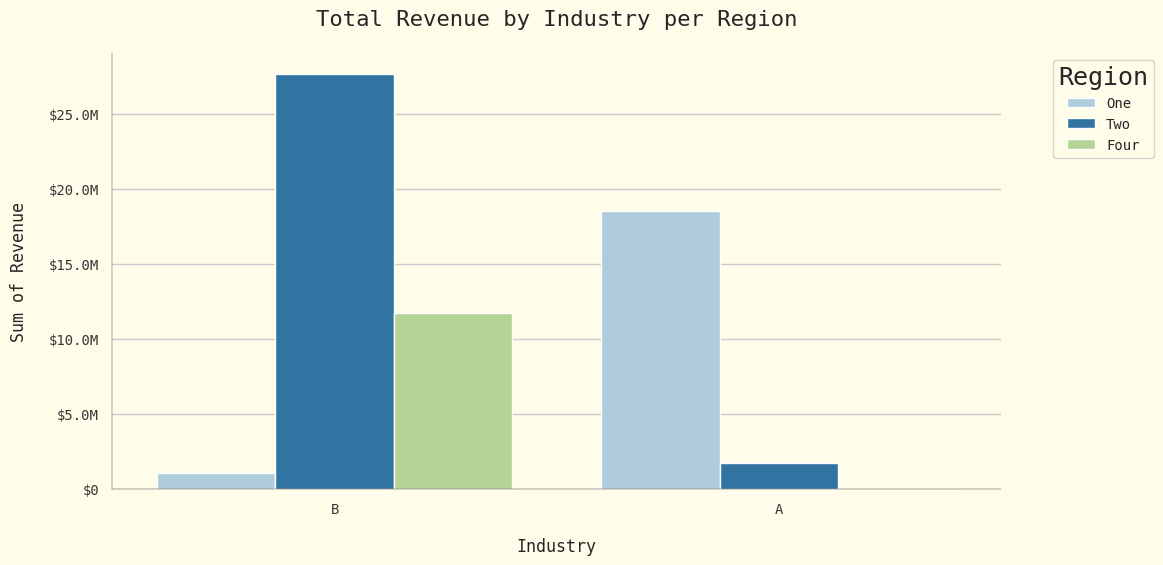

In [482]:
# Copy the DataFrame and filter by region and industry
top_regions = df_perf.copy()
top_regions = top_regions[top_regions['region'].isin(['One', 'Two', 'Four'])]
top_regions['region'] = top_regions['region'].cat.remove_unused_categories()
top_regions_industry = top_regions[top_regions['industry'].isin(['B', 'A'])]

# Remove any unused categories in the 'region' column

# Now call the plotting function. Only the filtered regions will be used.
plot_categorical_distribution(
    top_regions_industry,
    'industry', 'revenue', hue='region', agg_func='sum',
    title='Total Revenue by Industry per Region'
)

In [486]:
top_regions_industry.groupby(['region', 'industry'])[['revenue', 'impressions']].sum()

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/1023341703.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_regions_industry.groupby(['region', 'industry'])[['revenue', 'impressions']].sum()


revenue  impressions
region industry                          
One    A        18502708.693   1074476020
       B         1037180.523     72129177
Two    A         1763856.736    321057485
       B        27692644.204   6054384070
Four   A               8.375          438
       B        11726238.706   4557488283

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/78507419.py:31: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(filtered_data[cat_col]):


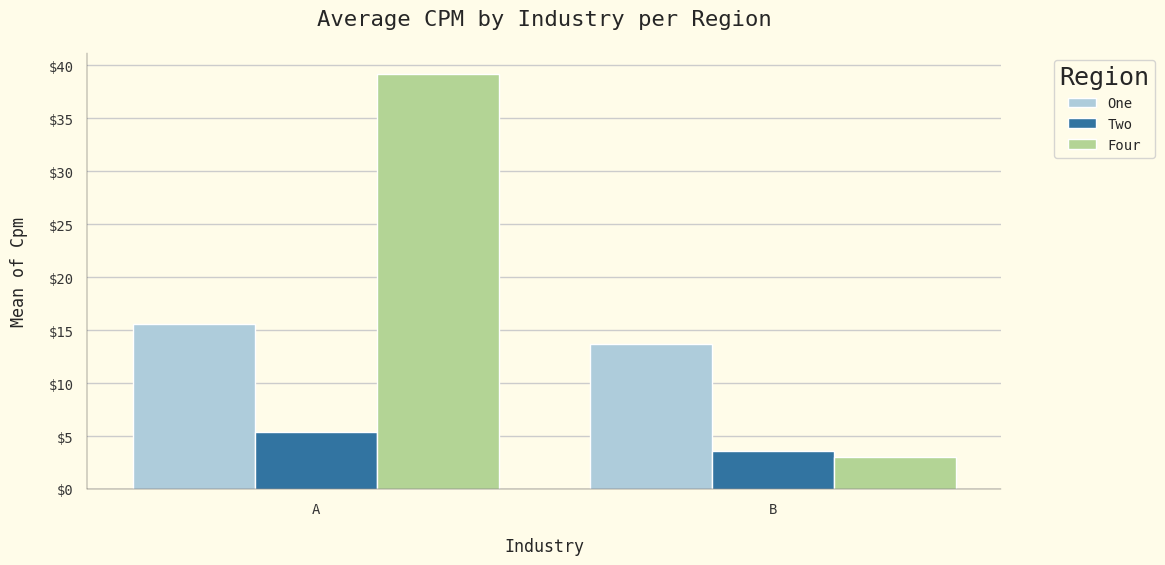

In [487]:
# Average CPM by Industry
plot_categorical_distribution(top_regions_industry,
                              'industry', 'cpm', hue='region', agg_func='mean', format_y_as_money=True,
                              title='Average CPM by Industry per Region')

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/2300985211.py:31: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(filtered_data[cat_col]):


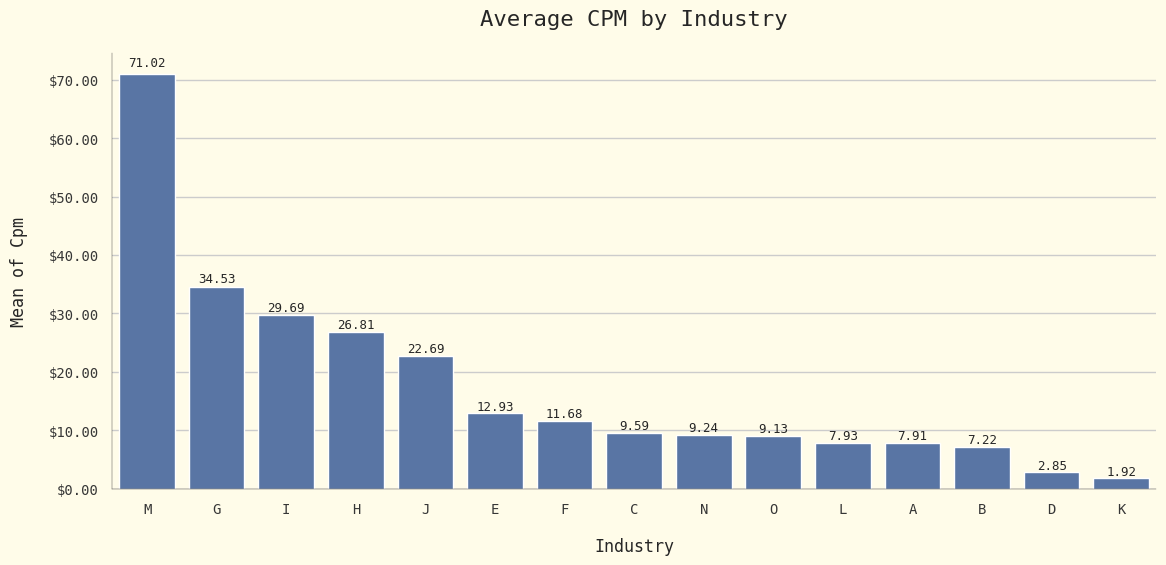

In [454]:
# Average CPM by Industry
plot_categorical_distribution(df_perf,
                              'industry', 'cpm', agg_func='mean', palette=None, format_y_as_money=False,
                              title='Average CPM by Industry')

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/78507419.py:31: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(filtered_data[cat_col]):


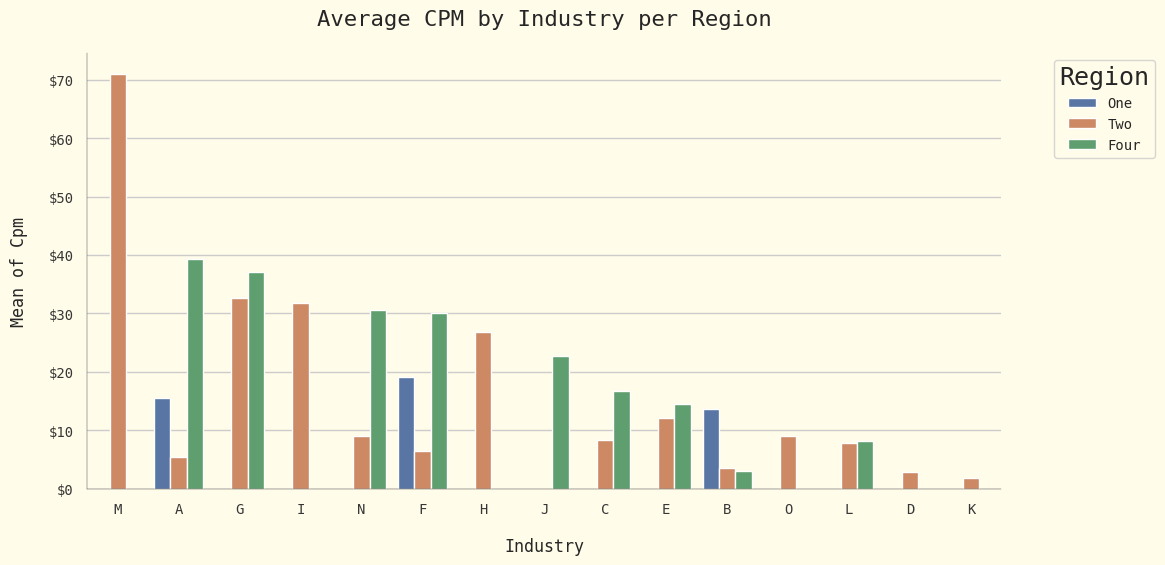

In [491]:
# Average CPM by Industry
plot_categorical_distribution(top_regions,
                              'industry', 'cpm', hue='region', agg_func='mean', palette=None, 
                              title='Average CPM by Industry per Region', format_y_as_money=True)

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/2300985211.py:31: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(filtered_data[cat_col]):


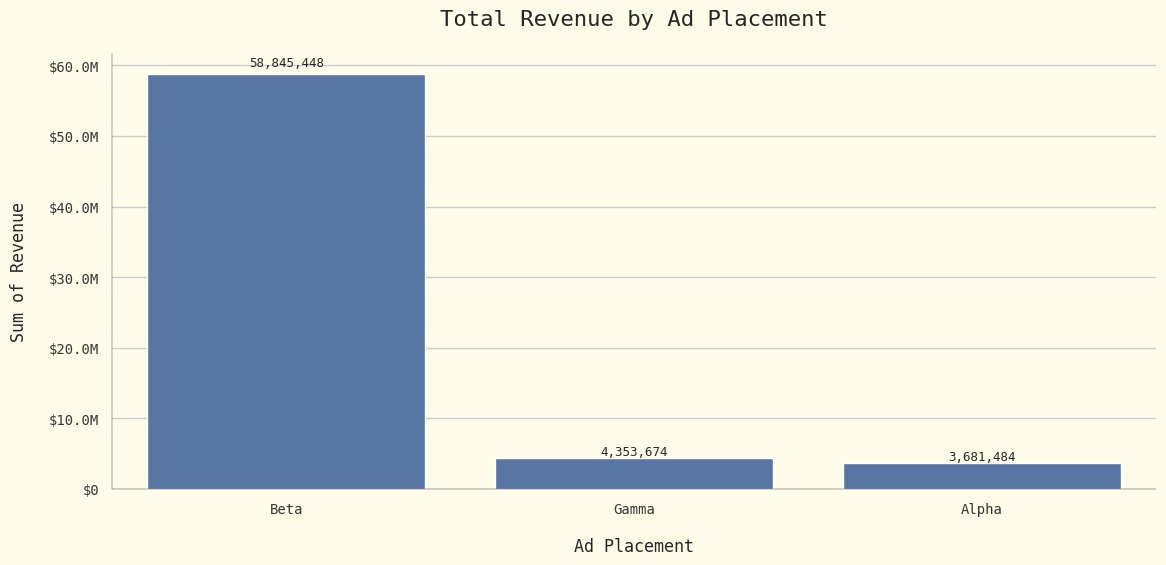

In [405]:
# Total Revenue by Ad Placement
plot_categorical_distribution(df_perf, 'ad_placement', 'revenue', agg_func='sum', palette=None, title='Total Revenue by Ad Placement')

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/78507419.py:31: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(filtered_data[cat_col]):


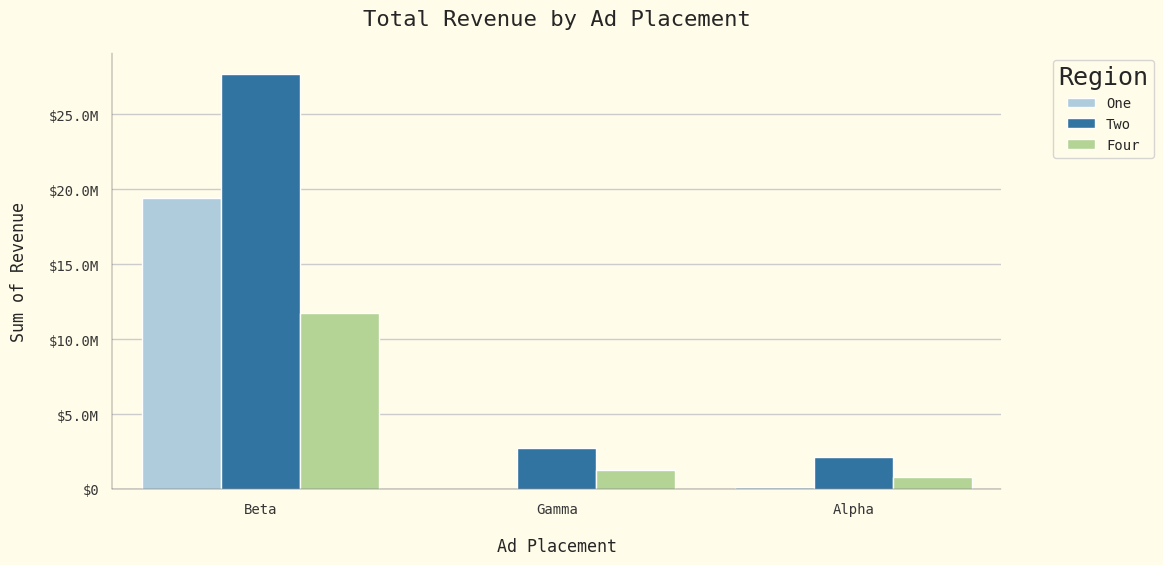

In [488]:
# Total Revenue by Ad Placement
plot_categorical_distribution(
    top_regions,
    'ad_placement', 'revenue', hue='region', agg_func='sum', title='Total Revenue by Ad Placement'
)

In [117]:
# Group by both region and ad_placement
summary_by_region = df.groupby(['region', 'industry', 'ad_placement']).agg(
    total_rows=pd.NamedAgg(column='account_id', aggfunc='count'),
    total_impressions=pd.NamedAgg(column='impressions', aggfunc='sum'),
    average_cpm=pd.NamedAgg(column='cpm', aggfunc='mean'),
    total_revenue=pd.NamedAgg(column='revenue', aggfunc='sum')
).reset_index()

# Sort by region and total revenue (descending)
summary_by_region = summary_by_region.sort_values(['region', 'total_revenue'], ascending=[True, False])

# Format the numbers for better readability
summary_by_region['total_impressions'] = summary_by_region['total_impressions'].apply(lambda x: f'{x:,.0f}')
summary_by_region['average_cpm'] = summary_by_region['average_cpm'].apply(lambda x: f'${x:,.2f}' if pd.notna(x) else 'N/A')
summary_by_region['total_revenue'] = summary_by_region['total_revenue'].apply(lambda x: f'${x:,.2f}')

# Display the results
summary_by_region

/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/577466029.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_by_region = df.groupby(['region', 'industry', 'ad_placement']).agg(


,region,industry,ad_placement,total_rows,total_impressions,average_cpm,total_revenue
1,One,A,Beta,1418,"1,057,295,903",$16.95,"$18,371,153.04"
7,One,B,Beta,359,"71,980,006",$13.75,"$1,035,849.49"
0,One,A,Alpha,354,"17,180,117",$7.90,"$131,555.65"
30,One,F,Alpha,4,"301,337",$19.17,"$5,790.34"
6,One,B,Alpha,16,"149,171",$7.19,"$1,331.03"
...,...,...,...,...,...,...,...
2011,Fourteen,X,Beta,0,0,N/A,$0.00
2012,Fourteen,X,Delta,0,0,N/A,$0.00
2013,Fourteen,X,Epsilon,0,0,N/A,$0.00
2014,Fourteen,X,Gamma,0,0,N/A,$0.00


In [407]:
df.groupby('ad_placement').agg(
    total_rows=pd.NamedAgg(column='account_id', aggfunc='count'),
    total_impressions=pd.NamedAgg(column='impressions', aggfunc='sum'),
    average_cpm=pd.NamedAgg(column='cpm', aggfunc='mean'),
    total_revenue=pd.NamedAgg(column='revenue', aggfunc='sum')
).reset_index()

,ad_placement,total_rows,total_impressions,average_cpm,total_revenue
0,Alpha,43974,496353555,0.752,3681484.341
1,Beta,21176,11731348963,2.566,58845447.923
2,Delta,155,0,0.000,0.000
3,Epsilon,18,0,0.000,0.000
4,Gamma,209,411589378,3.804,4353673.653
5,Zeta,2,0,0.000,0.000


/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/2300985211.py:31: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(filtered_data[cat_col]):


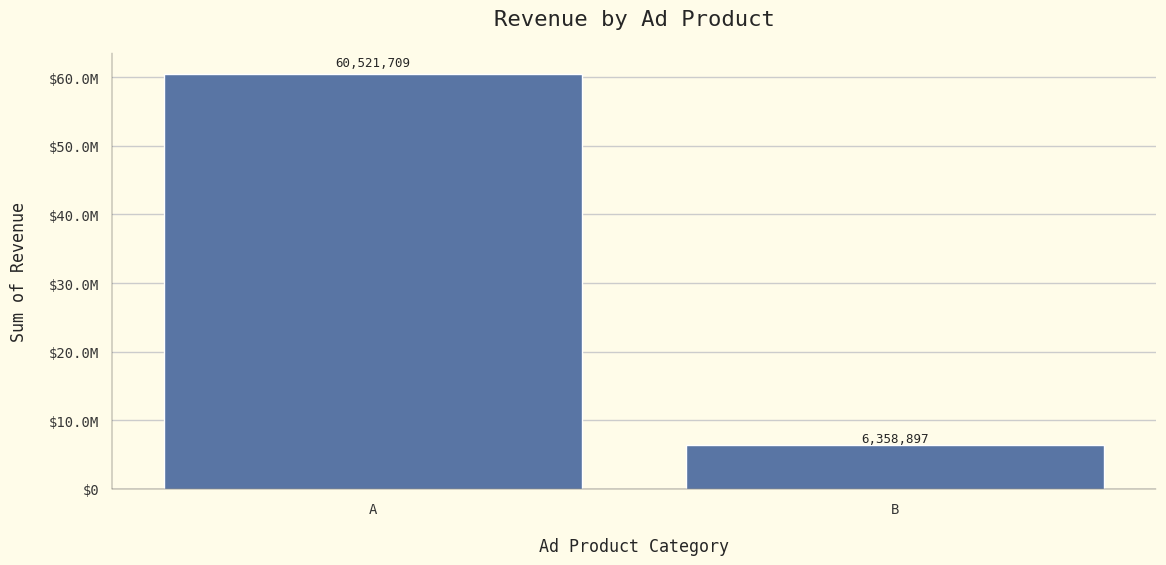

In [408]:
# Example of using hue: Revenue by Ad Product Category, split by Region
plot_categorical_distribution(df_perf,
                              'ad_product_category', 'revenue', agg_func='sum', palette=None,
                              title='Revenue by Ad Product')

### 5. Conclusions

* key insights

In [225]:
print("Percentage of rows with missing CPM:", len(df[df['cpm'].isna()]) / len(df))

Percentage of rows with missing CPM: 0.8318735312967315


In [442]:
print("Ad Product A generates 90.5% of all revenue, while Product C generates none: ", df[df['ad_product_category'] == 'A'].revenue.sum() / df.revenue.sum())

Ad Product A generates 90.5% of all revenue, while Product C generates none:  0.9049216618562734


In [270]:
accounts_df = df.groupby(['account_id', 'region', 'ad_product_category']).agg(
    total_customers=pd.NamedAgg(column='customer_id', aggfunc='nunique'),
    total_impressions=pd.NamedAgg(column='impressions', aggfunc='sum'),
    average_cpm=pd.NamedAgg(column='cpm', aggfunc='mean'),
    total_revenue=pd.NamedAgg(column='revenue', aggfunc='sum'),
    mean_revenue=pd.NamedAgg(column='revenue', aggfunc='mean')
).reset_index().sort_values('total_impressions', ascending=False)

accounts_df.head(10)


/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/1237070292.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accounts_df = df.groupby(['account_id', 'region', 'ad_product_category']).agg(


,account_id,region,ad_product_category,total_customers,total_impressions,average_cpm,total_revenue,mean_revenue
3,0.0,Two,A,1,6018783968,3.956,27575328.354,62671.201
9,0.0,Four,A,1,4557488282,2.566,11726238.508,26772.234
34062,6777.0,One,A,21,685853692,15.758,10812151.941,9344.989
23814,3363.0,One,A,2,315934999,20.461,5914765.707,29872.554
24280,3545.0,Two,B,1,111641470,6.650,1178063.986,117806.399
3360,11306.0,One,A,1,72892552,27.246,1935978.147,38719.563
21717,2730.0,Two,A,5,52894471,1.730,193823.416,350.494
23404,3248.0,Four,B,1,42743004,15.162,518348.172,15245.534
21130,2521.0,Two,B,1,38128034,1.811,343904.996,34390.500
24286,3545.0,Four,B,1,34528592,6.014,343602.009,49086.001


In [227]:
print("Percentage of accounts with no impressions:", len(accounts_df[accounts_df['total_impressions'] == 0]) / len(accounts_df))

Percentage of accounts with no impressions: 0.7815764482431149


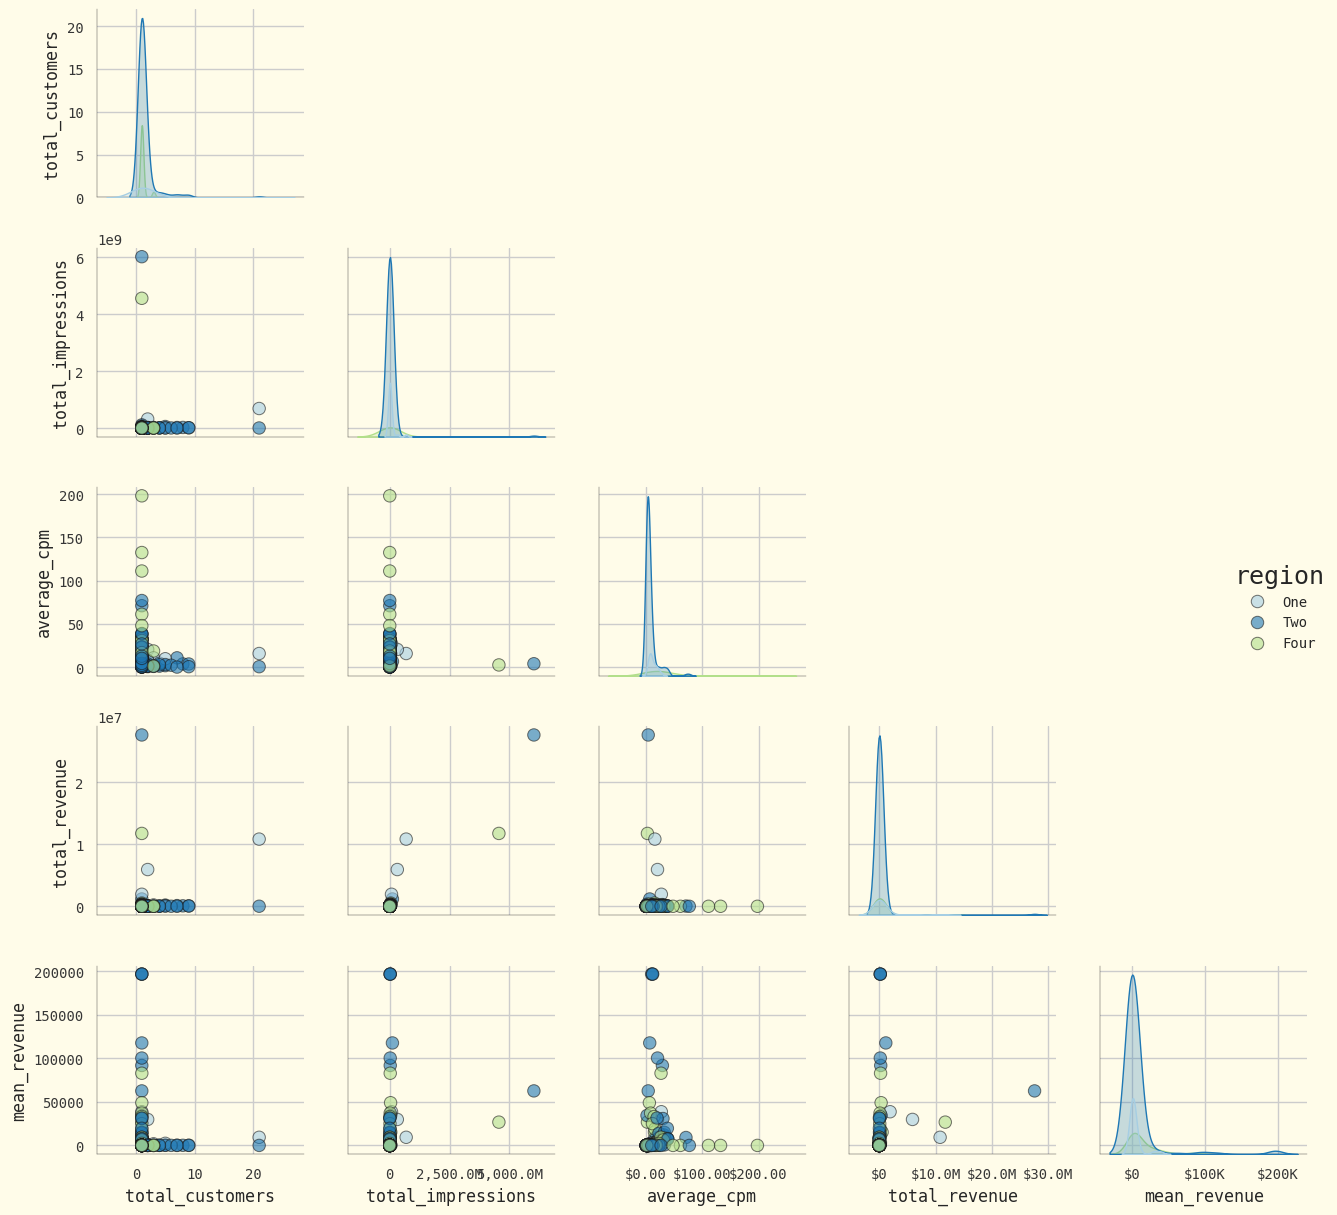

In [409]:
plot_df = accounts_df[accounts_df['total_impressions'] >= 1].copy()
plot_df = plot_df[plot_df['region'].isin(['One', 'Two', 'Four'])]
plot_df['region'] = plot_df['region'].cat.remove_unused_categories()

# Plot distributions for each variable
variables = ['total_customers', 'total_impressions', 'average_cpm', 'total_revenue', 'mean_revenue']
titles = ['Total Accounts Distribution', 'Total Impressions Distribution', 
          'Average CPM Distribution', 'Total Revenue Distribution', 
          'Mean Revenue Distribution']

# Select numerical columns for pairplot
numerical_cols = ['total_customers', 'total_impressions', 'average_cpm', 'total_revenue', 'mean_revenue']

# Create pairplot
g = sns.pairplot(
    plot_df[numerical_cols + ['region']],
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
    height=2.5, hue='region', palette='Paired'
)

# Format the axes
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

# Format the diagonal plots
for i in range(len(numerical_cols)):
    if 'revenue' in numerical_cols[i]:
        g.axes[i, i].xaxis.set_major_formatter(mticker.FuncFormatter(
            lambda x, pos: f'${x/1e6:,.1f}M' if x >= 1e6 else f'${x/1e3:,.0f}K' if x >= 1e3 else f'${x:,.0f}'
        ))
    elif numerical_cols[i] == 'total_impressions':
        g.axes[i, i].xaxis.set_major_formatter(mticker.FuncFormatter(
            lambda x, pos: f'{x/1e6:,.1f}M' if x >= 1e6 else f'{x/1e3:,.0f}K' if x >= 1e3 else f'{x:,.0f}'
        ))
    elif numerical_cols[i] == 'average_cpm':
        g.axes[i, i].xaxis.set_major_formatter(mticker.FormatStrFormatter('$%.2f'))

plt.tight_layout()

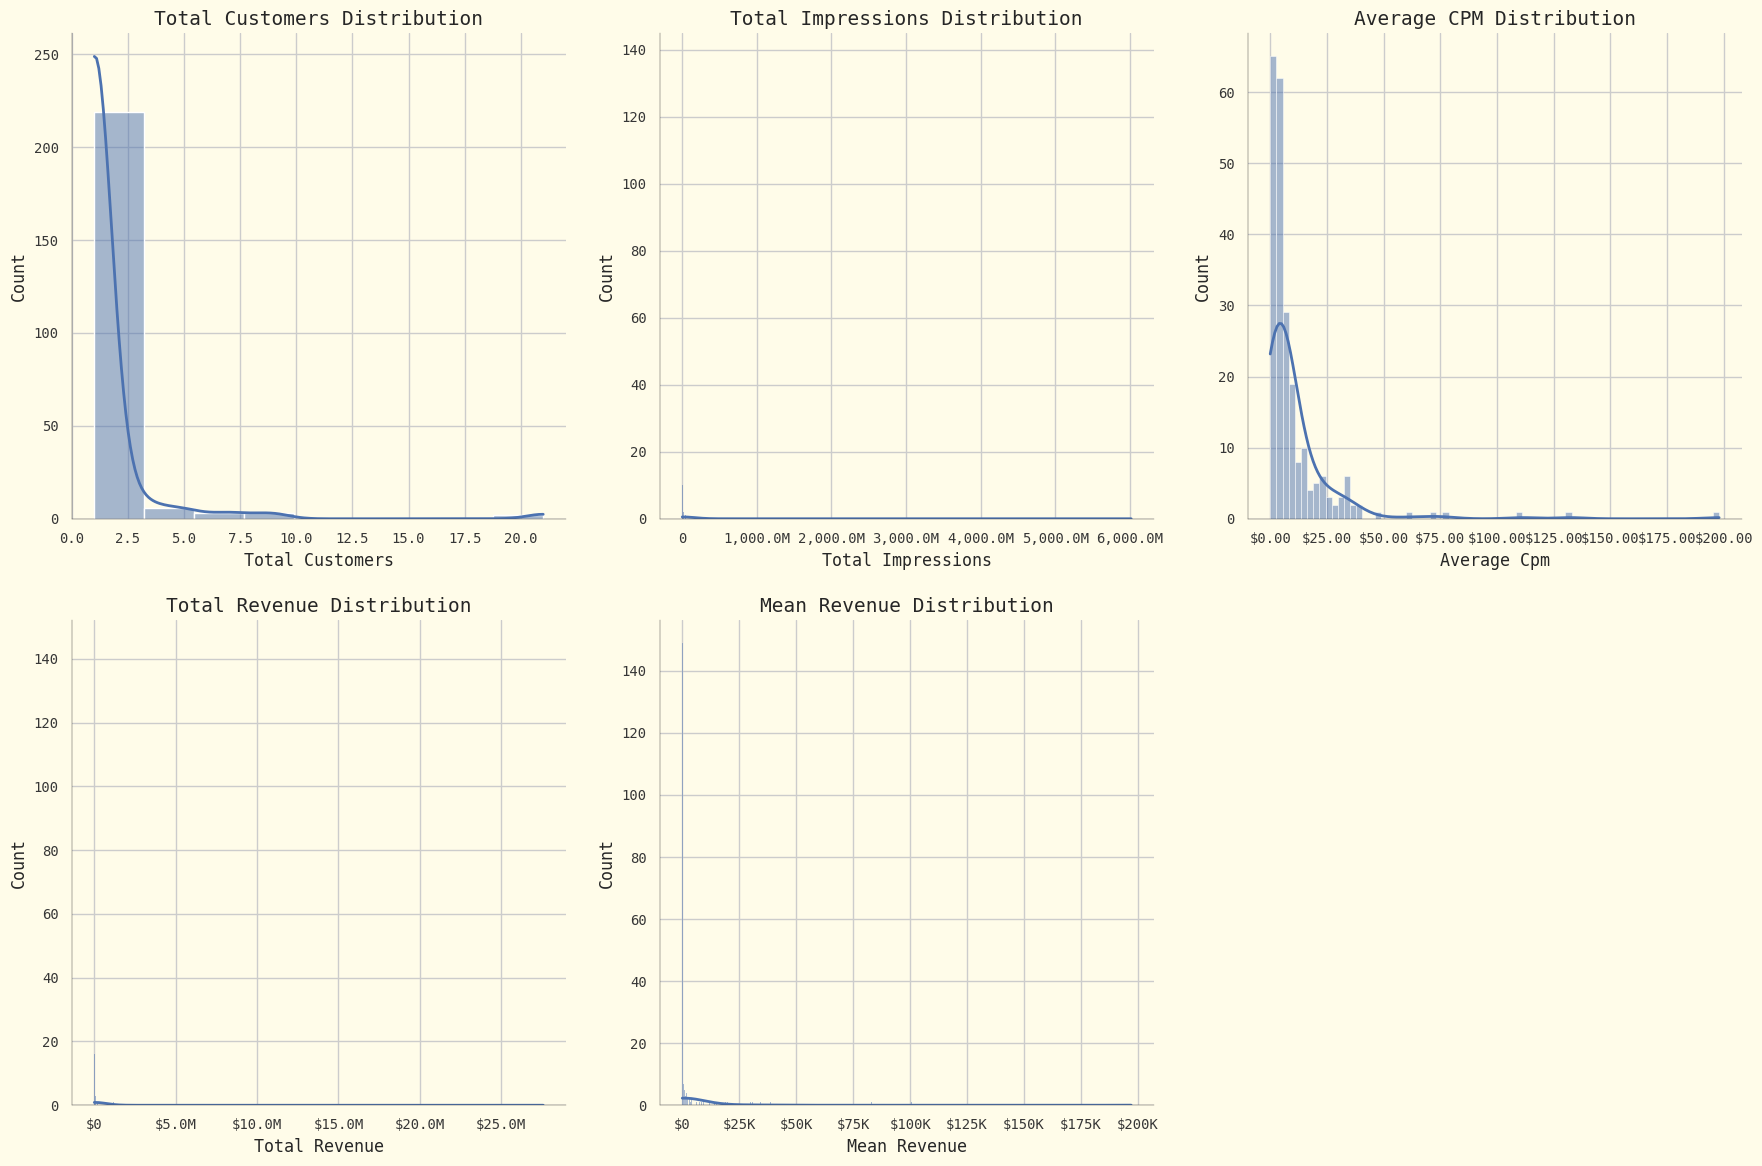

In [ ]:
# Set up the figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot distributions for each variable
variables = ['total_customers', 'total_impressions', 'average_cpm', 'total_revenue', 'mean_revenue']
titles = ['Total Accounts Distribution', 'Total Impressions Distribution', 
          'Average CPM Distribution', 'Total Revenue Distribution', 
          'Mean Revenue Distribution']

for i, (var, title) in enumerate(zip(variables, titles)):
    ax = axes[i]
    
    # Create the distribution plot
    sns.histplot(data=plot_df, x=var, ax=ax, kde=True)
    
    # Format based on variable type
    if 'revenue' in var:
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(
            lambda x, pos: f'${x/1e6:,.1f}M' if x >= 1e6 else f'${x/1e3:,.0f}K' if x >= 1e3 else f'${x:,.0f}'
        ))
    elif var == 'total_impressions':
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(
            lambda x, pos: f'{x/1e6:,.1f}M' if x >= 1e6 else f'{x/1e3:,.0f}K' if x >= 1e3 else f'{x:,.0f}'
        ))
    elif var == 'average_cpm':
        ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('$%.2f'))
    
    # Add title and labels
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(var.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    
    # Remove top and right spines
    sns.despine(ax=ax)

# Remove the last empty subplot
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()

In [506]:
accounts_df

,account_id,region,ad_product_category,total_customers,total_impressions,average_cpm,total_revenue,mean_revenue
3,0.0,Two,A,1,6018783968,3.956,27575328.354,62671.201
9,0.0,Four,A,1,4557488282,2.566,11726238.508,26772.234
34062,6777.0,One,A,21,685853692,15.758,10812151.941,9344.989
23814,3363.0,One,A,2,315934999,20.461,5914765.707,29872.554
24280,3545.0,Two,B,1,111641470,6.650,1178063.986,117806.399
...,...,...,...,...,...,...,...,...
14734,1646.0,Twelve,B,0,0,NaN,0.000,NaN
14735,1646.0,Twelve,C,0,0,NaN,0.000,NaN
14736,1646.0,Thirteen,A,0,0,NaN,0.000,NaN
14737,1646.0,Thirteen,B,0,0,NaN,0.000,NaN


Revenue Concentration Analysis:
Top 5 customers contribute: 86.67% of total revenue
Top 10 customers contribute: 90.65% of total revenue
Top 20 customers contribute: 93.83% of total revenue

CPM Comparison:
Average CPM across all customers: $2.67
Average CPM for top 5 customers: $14.00
Average CPM for top 10 customers: $12.88

Product Category Distribution:

All Accounts:
ad_product_category
A   33.333
B   33.333
C   33.333
Name: proportion, dtype: float64

Top 5 Accounts:
ad_product_category
A   100.000
Name: proportion, dtype: float64

Region Distribution:

All Accounts:
region
One        7.143
Two        7.143
Three      7.143
Four       7.143
Five       7.143
Six        7.143
Seven      7.143
Eight      7.143
Nine       7.143
Ten        7.143
Eleven     7.143
Twelve     7.143
Thirteen   7.143
Fourteen   7.143
Name: proportion, dtype: float64

Top 5 Accounts:
region
One        60.000
Two        20.000
Four       20.000
Three       0.000
Five        0.000
Six         0.000
Seven     

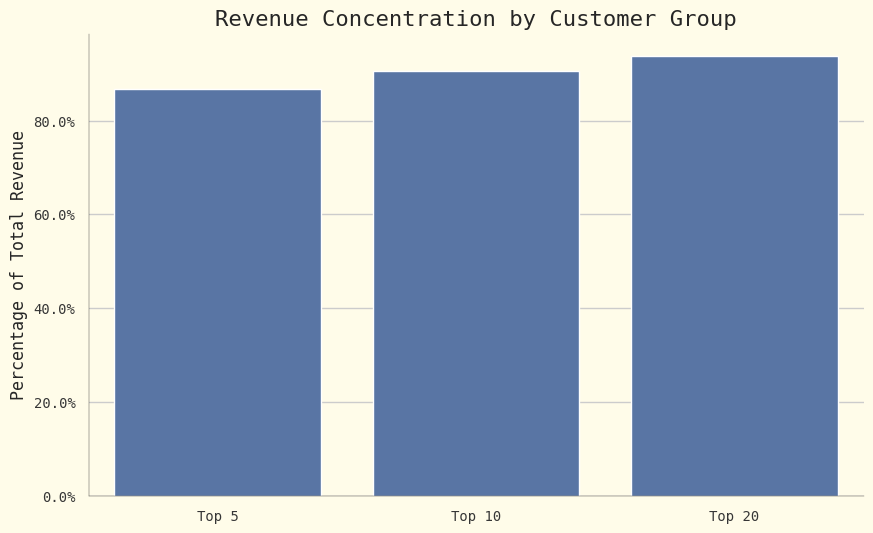

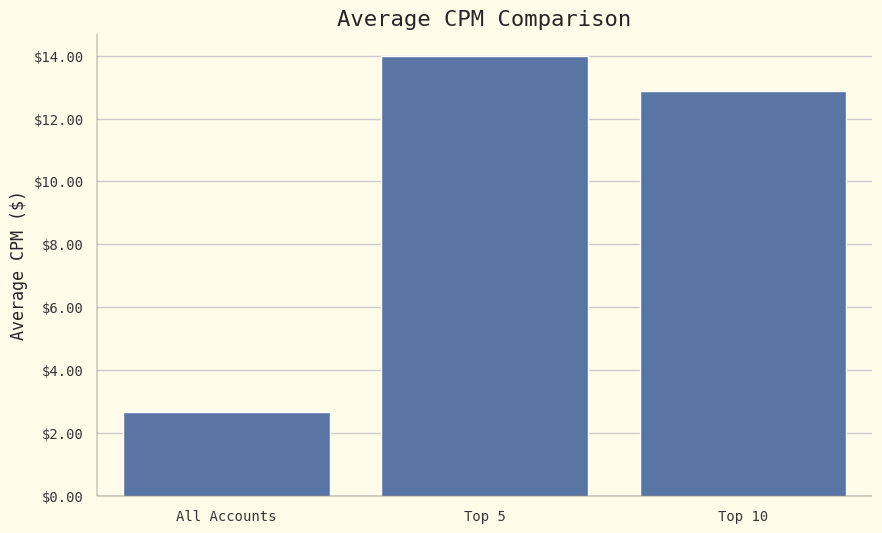

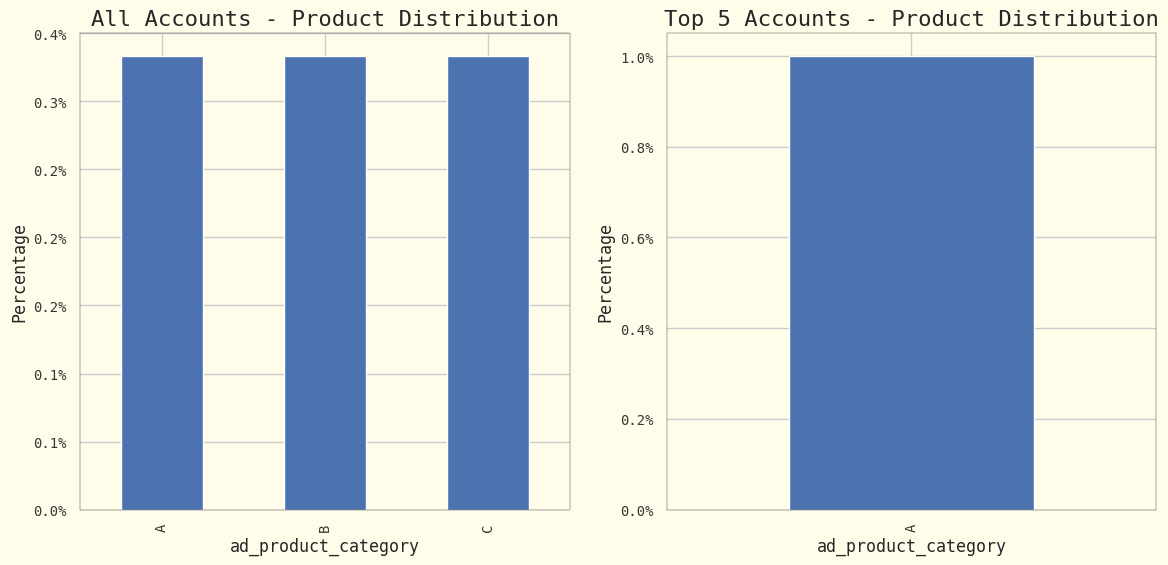

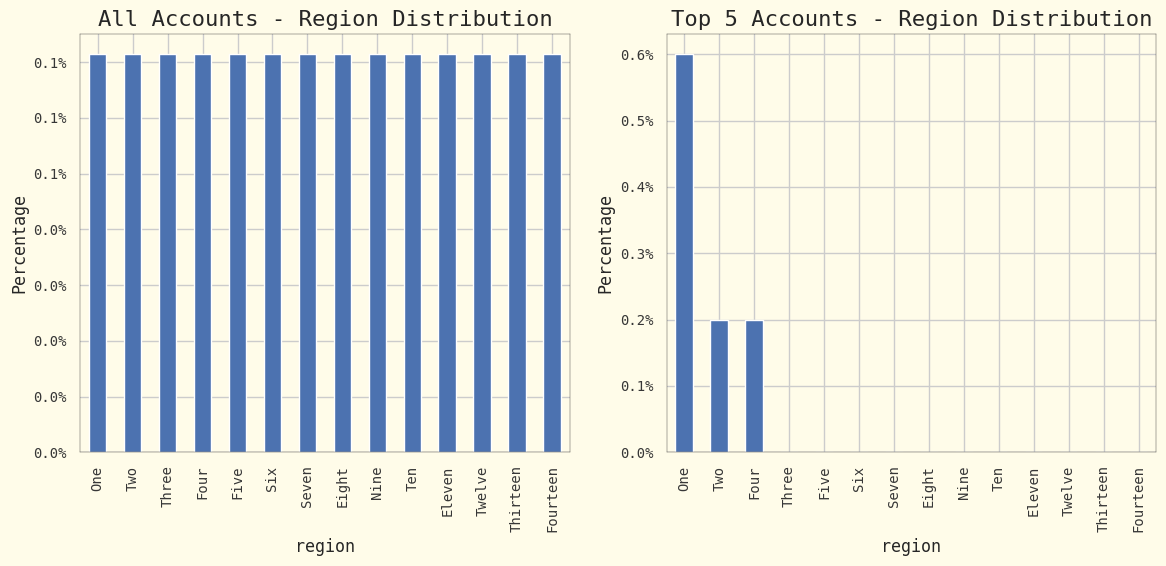

In [509]:
# First, let's calculate the revenue concentration
total_revenue = accounts_df['total_revenue'].sum()

# Calculate revenue for top customers
top_5_customers = accounts_df.nlargest(5, 'total_revenue')
top_10_customers = accounts_df.nlargest(10, 'total_revenue')
top_20_customers = accounts_df.nlargest(20, 'total_revenue')

# Calculate percentages
top_5_percentage = (top_5_customers['total_revenue'].sum() / total_revenue) * 100
top_10_percentage = (top_10_customers['total_revenue'].sum() / total_revenue) * 100
top_20_percentage = (top_20_customers['total_revenue'].sum() / total_revenue) * 100

print(f"Revenue Concentration Analysis:")
print(f"Top 5 customers contribute: {top_5_percentage:.2f}% of total revenue")
print(f"Top 10 customers contribute: {top_10_percentage:.2f}% of total revenue")
print(f"Top 20 customers contribute: {top_20_percentage:.2f}% of total revenue")

# Compare CPMs between top customers and average
avg_cpm_all = accounts_df['average_cpm'].mean()
avg_cpm_top_5 = top_5_customers['average_cpm'].mean()
avg_cpm_top_10 = top_10_customers['average_cpm'].mean()

print("\nCPM Comparison:")
print(f"Average CPM across all customers: ${avg_cpm_all:.2f}")
print(f"Average CPM for top 5 customers: ${avg_cpm_top_5:.2f}")
print(f"Average CPM for top 10 customers: ${avg_cpm_top_10:.2f}")

# Analyze product/region distribution
print("\nProduct Category Distribution:")
print("\nAll Accounts:")
print(accounts_df['ad_product_category'].value_counts(normalize=True) * 100)

print("\nTop 5 Accounts:")
print(top_5_customers['ad_product_category'].value_counts(normalize=True) * 100)

print("\nRegion Distribution:")
print("\nAll Accounts:")
print(accounts_df['region'].value_counts(normalize=True) * 100)

print("\nTop 5 Accounts:")
print(top_5_customers['region'].value_counts(normalize=True) * 100)

# Create visualizations
# 1. Revenue concentration
plt.figure(figsize=(10, 6))
sns.barplot(x=['Top 5', 'Top 10', 'Top 20'], 
            y=[top_5_percentage, top_10_percentage, top_20_percentage])
plt.title('Revenue Concentration by Customer Group')
plt.ylabel('Percentage of Total Revenue')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f%%'))
sns.despine()
plt.show()

# 2. CPM comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['All Accounts', 'Top 5', 'Top 10'],
            y=[avg_cpm_all, avg_cpm_top_5, avg_cpm_top_10])
plt.title('Average CPM Comparison')
plt.ylabel('Average CPM ($)')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('$%.2f'))
sns.despine()
plt.show()

# 3. Product category distribution comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
accounts_df['ad_product_category'].value_counts(normalize=True).plot(kind='bar')
plt.title('All Accounts - Product Distribution')
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f%%'))

plt.subplot(1, 2, 2)
top_5_customers['ad_product_category'].value_counts(normalize=True).plot(kind='bar')
plt.title('Top 5 Accounts - Product Distribution')
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f%%'))

plt.tight_layout()
plt.show()

# 4. Region distribution comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
accounts_df['region'].value_counts(normalize=True).plot(kind='bar')
plt.title('All Accounts - Region Distribution')
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f%%'))

plt.subplot(1, 2, 2)
top_5_customers['region'].value_counts(normalize=True).plot(kind='bar')
plt.title('Top 5 Accounts - Region Distribution')
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f%%'))

plt.tight_layout()
plt.show()

1.  **Investigate Missing CPM/Revenue:** THIS IS THE MOST IMPORTANT. Understand *why* ~83% of rows lack this data.
    * Are these non-paid/organic posts tracked alongside ads?
    * Are they campaigns using different objectives (e.g., clicks, installs) where CPM isn't the primary metric logged here?
    * Is it a data pipeline issue?
    * *Action:* Talk to data source owners. This context heavily influences overall business interpretation.

2.  **Analyze Zero Impressions:** Understand why >75% of original rows show 0 impressions. Filter them for performance metrics (like CPM), but their presence needs explanation. Do they represent setup but non-executed campaigns?

3.  **Deep Dive into Regional Differences:** Brazil vs. Spanish LATAM is core to the role.
    * Why does one region have higher/lower average CPM? (Mix of industries, ad products, competition?)
    * Does revenue growth differ significantly?
    * Are specific Ad Products or Industries dominant in one region vs. the other?
    * *Action:* Use the `plot_categorical_distribution` function with `hue='region'` for various metrics (Revenue, CPM, Impression Count) across Industries, Ad Products, Placements.

4.  **Product & Placement Performance:**
    * Identify high-revenue *and* high-CPM products/placements (potential cash cows).
    * Identify high-revenue *but* low-CPM products/placements (potential for optimization or volume plays).
    * Identify low-revenue *but* high-CPM products/placements (potential for growth focus).
    * *Action:* Analyze the plots generated. Calculate Revenue per Impression for different segments.

5.  **Industry Analysis:**
    * Which industries are the biggest spenders (Total Revenue)?
    * Which industries pay the highest premiums (Average CPM)? Are they the same?
    * How does industry mix differ by region and how does that impact regional CPM?
    * *Action:* Correlate Industry Revenue/CPM with Regional performance. Inform sales strategy.

6.  **Outlier Investigation:**
    * Examine the rows with extremely high CPMs or Revenue (e.g., CPM > $100, Revenue > $100k). Are they specific events, rare high-value products, or potential data errors?
    * *Action:* Filter `df_perf` for top percentile CPM/Revenue and examine the associated dimensions (`ad_product_category`, `industry`, `date`).

7.  **Customer Concentration:**
    * What percentage of revenue comes from the top 5, 10, 20 `customer_id`s?
    * Do these top customers have different CPMs or use different products/regions than average?
    * *Action:* Group `df_perf` by `customer_id`, aggregate revenue, sort, and calculate cumulative contribution.

8.  **Synthesize for Presentation:** Structure findings around:
    * Overall Monetization Health (Trends in Revenue, CPM).
    * Key Drivers (Which Regions, Products, Industries matter most?).
    * Opportunities (e.g., Grow high-CPM products, optimize low-CPM placements, target specific industries in specific regions).
    * Risks (e.g., Missing data implies uncertainty, customer concentration, declining CPM in a key segment).
    * *Action:* Use the generated plots and analysis points to build your meeting materials. Clearly state assumptions made (especially filtering).

----